# EDA of Weather Stations

<p> This python notebook is still in progress. The notebook is currently limited to analyzing 2 decades of data from both Temperature and Precipitation. But later version will be improved to analyze longer time spans. <p/>
<p> The current version of the notebook focuses on both temperature and precipitation datasets. Monthly temperature values, and combined mean seasonal temperature values are presented in two different figures.  Additionally, two seasonal precipitation plots are presented. The fist one focuses on the mean winter precipitation (average of December precipitation of previous year, January and February precipitation of following year). The second seasonal precipitation plot is mean of spring precipitation (average of March, April, and May month precipitation of each year). Furthermore, monthly precipitation values (from 2000-2020) can be found in monthly precipitation plot. 
Finally, both temperaute and precipitation datasets are presented as time series with the El Nino and La Nina years labeled.  <p/>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import datetime
import itertools
import os
import csv

## CSV file locations

<p> Enter the name of Temperature and Precipitation CSV files </p>

In [2]:
temp_csv_file_loc = '/Users/onersufri/Documents/Weather-Project/Box-folder/T&P_Datasets/MADERA_MUNI_AP(T).csv'
precipitation_csv_file_loc = '/Users/onersufri/Documents/Weather-Project/Box-folder/T&P_Datasets/USW00093242.csv'

## Create Functions

### Create a directory called the name of station name

In [3]:
def create_directory(df_input):
    
    df = df_input
    
    # Create a directory named as the station name
    dir_name = (df['Name'][0].replace(" ","_"))
    isExist = os.path.exists(dir_name)
    
    if not isExist:
        # Create a new directory with the name of station name
        os.mkdir(dir_name)
        print('The new ' + dir_name + ' is created!')
    else:
        print('The directory \"' + dir_name + '\" already exist!')

### Create function that converts El Nino dates into Matplotlib internal format

In [4]:
def elninoDates():
    # WEAK EL NINO
    start_date_e1 = datetime.datetime(2004, 7, 15)
    end_date_e1 = datetime.datetime(2005, 1, 15)
    
    start_date_e2 = datetime.datetime(2006, 9, 15)
    end_date_e2 = datetime.datetime(2007, 1, 16)
    
    start_date_e3 = datetime.datetime(2014, 10, 15)
    end_date_e3 = datetime.datetime(2015, 5, 1)
    
    start_date_e4 = datetime.datetime(2018, 10, 15)
    end_date_e4 = datetime.datetime(2019, 5, 1)
    
    # MODERATE EL NINO
    start_date_e5 = datetime.datetime(2002, 12, 1)
    end_date_e5 = datetime.datetime(2003, 4, 1)
    
    start_date_e6 = datetime.datetime(2009, 5, 1)
    end_date_e6 = datetime.datetime(2010, 2, 25)
    
    # STRONG EL NINO
    start_date_e7 = datetime.datetime(2015, 5, 1)
    end_date_e7 = datetime.datetime(2016, 3, 23)
    
    # Convert the datetime data to Matplotlib's internal date format
    elnino_weak_beg = mdates.date2num(start_date_e1)
    elnino_weak_end = mdates.date2num(end_date_e1)
    
    elnino_weak_beg2 = mdates.date2num(start_date_e2)
    elnino_weak_end2 = mdates.date2num(end_date_e2)
    
    elnino_weak_beg3 = mdates.date2num(start_date_e3)
    elnino_weak_end3 = mdates.date2num(end_date_e3)
    
    elnino_weak_beg4 = mdates.date2num(start_date_e4)
    elnino_weak_end4 = mdates.date2num(end_date_e4)
    
    elnino_moderate_beg = mdates.date2num(start_date_e5)
    elnino_moderate_end = mdates.date2num(end_date_e5)

    elnino_moderate_beg2 = mdates.date2num(start_date_e6)
    elnino_moderate_end2 = mdates.date2num(end_date_e6)

    elnino_strong_beg = mdates.date2num(start_date_e7)
    elnino_strong_end = mdates.date2num(end_date_e7)
    
    # Create dictionary and return the values
    df_elnino = {'elnino_beg': [elnino_weak_beg, elnino_weak_beg2, elnino_weak_beg3, elnino_weak_beg4,
                                 elnino_moderate_beg, elnino_moderate_beg2, elnino_strong_beg],
                 'elnino_end': [elnino_weak_end, elnino_weak_end2, elnino_weak_end3, elnino_weak_end4,
                                 elnino_moderate_end, elnino_moderate_end2, elnino_strong_end],
                 'Strength': ['Weak', 'Weak', 'Weak', 'Weak', 'Moderate', 'Moderate', 'Strong']
                }
    
    return df_elnino

### Create function that converts La Nina dates into Matplotlib internal format

In [5]:
def laninaDates():
    # Weak LA NINA
    start_date = datetime.datetime(2000, 9, 15)
    end_date = datetime.datetime(2000, 12, 31)
    
    start_date2 = datetime.datetime(2005, 9, 1)
    end_date2 = datetime.datetime(2006, 1, 1)
    
    start_date3 = datetime.datetime(2008, 9, 10)
    end_date3 = datetime.datetime(2009, 3, 15)
    
    start_date4 = datetime.datetime(2016, 7, 15)
    end_date4 = datetime.datetime(2018, 5, 15)
    
    # MODERATE LA NINA
    start_date5 = datetime.datetime(2011, 9, 10)
    end_date5 = datetime.datetime(2012, 3, 15)
    
    start_date6 = datetime.datetime(2020, 8, 15)
    end_date6 = datetime.datetime(2021, 4, 1)
    
    # STRONG LA NINA
    start_date7 = datetime.datetime(1999, 1, 1)
    end_date7 = datetime.datetime(2000, 1, 1)
    
    start_date8 = datetime.datetime(2007, 9, 1)
    end_date8 = datetime.datetime(2008, 5, 31)
    
    start_date9 = datetime.datetime(2010, 7, 10)
    end_date9 = datetime.datetime(2011, 5, 1)
   
    # Convert the datetime data to Matplotlib's internal date format
    lanina_weak_beg = mdates.date2num(start_date)
    lanina_weak_end = mdates.date2num(end_date)

    lanina_weak_beg2 = mdates.date2num(start_date2)
    lanina_weak_end2 = mdates.date2num(end_date2)

    lanina_weak_beg3 = mdates.date2num(start_date3)
    lanina_weak_end3 = mdates.date2num(end_date3)

    lanina_weak_beg4 = mdates.date2num(start_date4)
    lanina_weak_end4 = mdates.date2num(end_date4)
    
    lanina_moderate_beg = mdates.date2num(start_date5)
    lanina_moderate_end = mdates.date2num(end_date5)
    
    lanina_moderate_beg2 = mdates.date2num(start_date6)
    lanina_moderate_end2 = mdates.date2num(end_date6)
    
    lanina_strong_beg = mdates.date2num(start_date7)
    lanina_strong_end = mdates.date2num(end_date7)

    lanina_strong_beg2 = mdates.date2num(start_date8)
    lanina_strong_end2 = mdates.date2num(end_date8)
    
    lanina_strong_beg3 = mdates.date2num(start_date9)
    lanina_strong_end3 = mdates.date2num(end_date9)
    
    # Create dictionary and return the values
    df_lanina = {'lanina_beg': [lanina_weak_beg, lanina_weak_beg2, lanina_weak_beg3, lanina_weak_beg4, lanina_moderate_beg,
                                             lanina_moderate_beg2, lanina_strong_beg, lanina_strong_beg2, lanina_strong_beg3],
                              'lanina_end': [lanina_weak_end, lanina_weak_end2, lanina_weak_end3, lanina_weak_end4, lanina_moderate_end,
                                             lanina_moderate_end2, lanina_strong_end, lanina_strong_end2, lanina_strong_end3],
                              'Strength': ['Weak', 'Weak', 'Weak', 'Weak', 'Moderate', 'Moderate', 'Strong', 'Strong', 'Strong']
                             }
    return df_lanina

### Create a function that plots Temperature and Precipitation data sets

In [6]:
def plot_t_and_p_data(df1, df3, station_name):
    df = df1
    df3 = df3
    
    station_name = station_name
    
    plt.rcParams['figure.figsize'] = [28, 18]
    fig, ax = plt.subplots(2,1)
    
    title = station_name + ' Station'
    fig.suptitle(title, fontsize=21, y=0.915)
    
    # Change figure background color
    fig.patch.set_facecolor('whitesmoke')
    
    # Subplot(211)
    ### Plot the temperature 
    x = pd.to_datetime(df['Date'],format='%Y/%m')
    y = df['Temperature']
    
    temp = ax[0].plot(x, y, marker='o', color='black')
    
    
    ### Add the La Nina years on the graph
    df_lanina = laninaDates()
    for index, row in (pd.DataFrame.from_dict(df_lanina)).iterrows():
        if row['Strength'] == 'Weak':
            color_choice = 'paleturquoise'
        elif row['Strength'] == 'Moderate':
            color_choice = 'skyblue'
        elif row['Strength'] == 'Strong':
            color_choice = 'deepskyblue'
        
        rect = plt.Rectangle((row['lanina_beg'], -20), (row['lanina_end'] - row['lanina_beg']), 100, color=color_choice)
        ax[0].add_patch(rect)

    ### Add the El Nino years on the graph
    df_elnino = elninoDates()
    for index, row in (pd.DataFrame.from_dict(df_elnino)).iterrows():
        if row['Strength'] == 'Weak':
            color_choice = 'mistyrose'
        elif row['Strength'] == 'Moderate':
            color_choice = 'lightpink'
        elif row['Strength'] == 'Strong':
            color_choice = 'salmon'
        
        rect = plt.Rectangle((row['elnino_beg'], -20), (row['elnino_end'] - row['elnino_beg']), 100, color=color_choice)
        ax[0].add_patch(rect)
    
    ### Set the x-axis and y-axis parameters.
    ax[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax[0].xaxis.set_minor_locator(mdates.MonthLocator())
    ax[0].xaxis.set_major_formatter(
        mdates.ConciseDateFormatter(ax[0].xaxis.get_major_locator()))
    ax[0].set_xticklabels([])
    
    ax[0].yaxis.set_major_locator(plt.MultipleLocator(5))
    ax[0].yaxis.set_minor_locator(plt.MultipleLocator(1))
    ax[0].set_ylabel('Temperature ($^\circ$C)', fontsize=15)
    
    min_t = df['Temperature'].min()
    max_t = df['Temperature'].max()
    ax[0].set_ylim((min_t - 3),(max_t + 3))
    
    mindate = (pd.to_datetime(df['Date'],format='%Y/%m').min())
    new_min_date = mindate - pd.to_timedelta(16, unit='W')
    maxdate = (pd.to_datetime(df['Date'],format='%Y/%m').max())
    new_max_date = maxdate + pd.to_timedelta(16, unit='W')
    ax[0].set_xlim(new_min_date, new_max_date)
    #ax[0].set_xlim(pd.to_datetime(df3['Date'],format='%Y/%m').min())
    
    # Subplot(212)
    ### Plot the Precipitation
    x2 = pd.to_datetime(df3['Date'],format='%Y/%m')
    y2 = df3['Precipitation']
    
    precip = ax[1].plot(x2, y2, marker='o', color = 'black')
    
    ### Add the La Nina years to the graph
    for index, row in (pd.DataFrame.from_dict(df_lanina)).iterrows():
        if row['Strength'] == 'Weak':
            color_choice = 'paleturquoise'
            rect_wl = plt.Rectangle((row['lanina_beg'], -20), (row['lanina_end'] - row['lanina_beg']), 100, color=color_choice)
            ax[1].add_patch(rect_wl)
        elif row['Strength'] == 'Moderate':
            color_choice = 'skyblue'
            rect_ml = plt.Rectangle((row['lanina_beg'], -20), (row['lanina_end'] - row['lanina_beg']), 100, color=color_choice)
            ax[1].add_patch(rect_ml)
        elif row['Strength'] == 'Strong':
            color_choice = 'deepskyblue'
            rect_sl = plt.Rectangle((row['lanina_beg'], -20), (row['lanina_end'] - row['lanina_beg']), 100, color=color_choice)
            ax[1].add_patch(rect_sl)
    
    ### Add the El Nino years to the graph
    for index, row in (pd.DataFrame.from_dict(df_elnino)).iterrows():
        if row['Strength'] == 'Weak':
            color_choice = 'mistyrose'
            rect_we = plt.Rectangle((row['elnino_beg'], -20), (row['elnino_end'] - row['elnino_beg']), 100, color=color_choice)
            ax[1].add_patch(rect_we)
        elif row['Strength'] == 'Moderate':
            color_choice = 'lightpink'
            rect_me = plt.Rectangle((row['elnino_beg'], -20), (row['elnino_end'] - row['elnino_beg']), 100, color=color_choice)
            ax[1].add_patch(rect_me)
        elif row['Strength'] == 'Strong':
            color_choice = 'salmon'
            rect_se = plt.Rectangle((row['elnino_beg'], -20), (row['elnino_end'] - row['elnino_beg']), 100, color=color_choice)
            ax[1].add_patch(rect_se)
    
    ### Set the x-axis and y-axis parameters for the second graph
    ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax[1].xaxis.set_minor_locator(mdates.MonthLocator())
    ax[1].xaxis.set_major_formatter(
        mdates.ConciseDateFormatter(ax[1].xaxis.get_major_locator()))
    
    ax[1].yaxis.set_major_locator(plt.MultipleLocator(5))
    ax[1].yaxis.set_minor_locator(plt.MultipleLocator(1))
    #ax[1].grid('False')
    ax[1].set_ylabel('Precipitation (cm)', fontsize=15)
    ax[1].tick_params(rotation=85)
    
    ppt_min = df3['Precipitation'].min()
    ppt_max = df3['Precipitation'].max()
    ax[1].set_ylim((ppt_min - 2), (ppt_max + 4))
    ax[1].set_xlim(new_min_date, new_max_date)

    ### Set the legend
    ax[1].legend(handles= [rect_wl, rect_ml, rect_sl, rect_we, rect_me, rect_se], 
                 labels = ['Weak La Nina', 'Moderate La Nina', 'Strong La Nina', 
                           'Weak El Nino', 'Moderate El Nino', 'Strong El Nino'], 
                 ncol = 2, loc= 'lower left', borderpad = 1.2, handleheight = 1.4, 
                 handlelength = 3.5, framealpha = 1, bbox_to_anchor=(0.0, -0.24))
    
    plt.subplots_adjust(hspace=0.06)               # spacing between subplots
    plt.xlabel('Time', fontsize=15, labelpad=15)
    
    
    # Save the figure
    figname = (station_name + '_Station-T-P_graph')
    directory_name = station_name
    plt.savefig(os.path.join(directory_name, figname))

### Create a function that plots mean seasonal precipitation

In [7]:
def plot_mean_seasonal_precipitation(seasonal_stats_df, mean_of_seasonal_mean_vals, standard_deviation, season, station_name):
    
    season = season
    sd = standard_deviation
    
    station_name = station_name
    directory_name = station_name
    
    # Start plotting
    fig, ax = plt.subplots()
    
    # Change figure background color
    fig.patch.set_facecolor('whitesmoke')
    
    
    if (season == 'Winter') | (season == 'winter'):
        winter_stats_df = seasonal_stats_df
        mean_of_winter_mean_vals = mean_of_seasonal_mean_vals
        
        winter_stats_df['Winter_Year'] = winter_stats_df['Winter_Year'].apply(lambda x: int(x.split('-')[0]))
        
        x = pd.to_datetime(winter_stats_df['Winter_Year'],format='%Y')
        y = winter_stats_df['Winter_Mean']
        
        ylabel_text = 'Mean Winter Precipitation (cm)'
        
        new_xticks = ['1999-2000', '2000-2001', '2001-2002', '2002-2003', '2003-2004', '2004-2005', 
                    '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
                    '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017',  
                    '2017-2018', '2018-2019', '2019-2020', '2020-2021']
        
        main_plot = ax.bar(x, list(y), color='skyblue',
                           edgecolor='black', width=290)
        
        # Plot the mean and standard deviation values
        mean = ax.axhline(y=mean_of_winter_mean_vals, color='r',linestyle='-')
        mean_with_sd = ax.axhline(y=(mean_of_winter_mean_vals + sd), color='b',linestyle='-.')
        mean_without_sd = ax.axhline(y=(mean_of_winter_mean_vals - sd), color='b',linestyle='-.')
        
        ### Set the x-axis and y-axis parameters
        ax.xaxis.set_major_locator(mdates.YearLocator()) 
        ax.xaxis.set_minor_locator(mdates.YearLocator())
        
        ax.set_xlim(pd.to_datetime('1998',format='%Y'), pd.to_datetime('2021',format='%Y'))
        ax.set_xticks(pd.to_datetime(winter_stats_df['Winter_Year'],format='%Y'))
        ax.set_xticklabels(new_xticks)
        ax.tick_params(rotation=85)
        
        ax.set_ylabel(ylabel_text, fontsize=15)
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
        
        ax.set_ylim(0, winter_stats_df['Winter_Mean'].max()+2)
        plt.xlabel('Winter Seasons', fontsize=15, labelpad=15)
        
        title = station_name + ' Station Winter Precipitation'
        fig.suptitle(title, fontsize=21, y=0.915)
        
        ### Set the legend
        string1 = 'Mean of mean winter precipitation = ' + str(round(mean_of_winter_mean_vals,4))
        string2 = 'Mean + SD = ' + str(round(mean_of_winter_mean_vals+sd, 4))
        string3 = 'Mean - SD = ' + str(round(mean_of_winter_mean_vals-sd, 4))
        ax.legend(handles= [main_plot, mean, mean_with_sd, mean_without_sd], 
              labels = ['Mean Winter Precipitation',string1, string2, string3 ], 
              ncol = 1, loc= 'upper right', borderpad = 1.2, handleheight = 1.4, 
              handlelength = 3.5, framealpha = 1)

        # Save the figure
        figname = (station_name + '_Station-Mean-Winter-Precipitation')
        plt.savefig(os.path.join(directory_name, figname))
        
    elif (season == 'Spring') | (season == 'spring'):
        spring_stats_df = seasonal_stats_df
        mean_of_spring_mean_vals = mean_of_seasonal_mean_vals
        
        x = pd.to_datetime(spring_stats_df['Spring_Year'],format='%Y')
        y = spring_stats_df['Spring_Mean']
        
        ylabel_text = 'Mean Spring Precipitation (cm)'
        
        main_plot = ax.bar(x, list(y), color='skyblue',
                           edgecolor='black', width=290)
        
        # Plot the mean and standard deviation values
        mean = ax.axhline(y=mean_of_spring_mean_vals, color='r',linestyle='-')
        mean_with_sd = ax.axhline(y=(mean_of_spring_mean_vals + sd), color='b',linestyle='-.')
        mean_without_sd = ax.axhline(y=(mean_of_spring_mean_vals - sd), color='b',linestyle='-.')
        
        ### Set the x-axis and y-axis parameters
        ax.xaxis.set_major_locator(mdates.YearLocator()) 
        ax.xaxis.set_minor_locator(mdates.YearLocator())
    
    
        ax.set_xlim(pd.to_datetime('1999',format='%Y'), pd.to_datetime('2021',format='%Y'))
        ax.tick_params(rotation=85)
        
        ax.set_ylabel(ylabel_text, fontsize=15)
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
        
        ax.set_ylim(0, spring_stats_df['Spring_Mean'].max()+2)
        plt.xlabel('Spring Seasons', fontsize=15, labelpad=15)
        
        title = station_name + ' Station Spring Precipitation'
        fig.suptitle(title, fontsize=21, y=0.915)
        
        ### Set the legend
        string1 = 'Mean of mean spring precipitation = ' + str(round(mean_of_spring_mean_vals,4))
        string2 = 'Mean + SD = ' + str(round(mean_of_spring_mean_vals+sd, 4))
        string3 = 'Mean - SD = ' + str(round(mean_of_spring_mean_vals-sd, 4))
        ax.legend(handles= [main_plot, mean, mean_with_sd, mean_without_sd], 
                  labels = ['Mean Spring Precipitation',string1, string2, string3 ], 
                  ncol = 1, loc= 'upper right', borderpad = 1.2, handleheight = 1.4, 
                  handlelength = 3.5, framealpha = 1)

        # Save the figure
        figname = (station_name + '_Station-Mean-Spring-Precipitation')    
        plt.savefig(os.path.join(directory_name, figname))

### Create a function that plots box plot of precipitation or temperature

In [8]:
def monthly_temp_precip_box_plot(df, choice_of_weather_value, station_name):
    
    variable = choice_of_weather_value
    station_name = station_name
    
    plt.rcParams['figure.figsize'] = [30, 20]
    
    if ((variable == 'temp') | (variable == 'temperature') | 
        (variable == 'Temp') | (variable == 'Temperature')):
        
        temp_df = df
        
        
        fig, ax = plt.subplots()
        
        # Change figure background color
        fig.patch.set_facecolor('whitesmoke')

        # Check for NaN values in the DataFrame and filter out
        if temp_df.isnull().values.any():
            filtered_temp_data = np.array(temp_df)[~np.isnan(temp_df)]
            y = filtered_temp_df
            main_plot = ax.boxplot(y, vert=True, patch_artist=True, 
                               flierprops={'markerfacecolor':'lightsalmon'})
        else:
            y = temp_df
            main_plot = ax.boxplot(y, vert=True, patch_artist=True, 
                               flierprops={'markerfacecolor':'lightsalmon'})
        
        for i in range(0,12):
            main_plot['boxes'][i].set_facecolor('lightsalmon')
            main_plot['medians'][i].set_color('black')
        
        
        for line in main_plot['medians']:
            # get position data for median line
            x1, y1 = line.get_xydata()[1] # top of median line
            # overlay median value
            plt.text(x1+0.03, y1, '%.2f' % y1,
                     horizontalalignment='left',
                     verticalalignment='center') # draw above, centered
        
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
        ylabel_text = 'Temperature ($^\circ$C)'
        ax.set_ylabel(ylabel_text, fontsize=15)
        
        new_xticks = ['January', 'February', 'March', 'April', 'May', 'June', 
                      'July', 'August', 'Spetember', 'October', 'November', 
                      'December']
        
        ax.set_xticklabels(new_xticks)
        xlabel_text = 'Months'
        ax.set_xlabel(xlabel_text, fontsize=15)
        #ax.grid(which='major', axis='x')
        
        
        title = station_name + ' Monthly Temperature Distribution from 2000-2020'
        fig.suptitle(title, fontsize=21, y=0.915)
        
        # Save the figure
        figname = (station_name + '_monthly_temp_box_plot')
        directory_name = station_name
        plt.savefig(os.path.join(directory_name, figname))
    
    elif ((variable == 'precip') | (variable == 'precipitation') | 
          (variable == 'Precip') | (variable == 'Precipitation')):
        
        pivot_df = df
        
        fig, ax = plt.subplots()
        
        # Change figure background color
        fig.patch.set_facecolor('whitesmoke')
        
        # Check for NaN values in the DataFrame
        if pivot_df.isnull().values.any():
            pivot_df_filled = pivot_df.fillna(-0.0000001)
            y = pivot_df_filled
            main_plot = ax.boxplot(y, vert=True, patch_artist=True, 
                               flierprops={'markerfacecolor':'blue'})
        else:
            pivot_df_filled = pivot_df.copy()
            y = pivot_df_filled
            main_plot = ax.boxplot(y, vert=True, patch_artist=True, 
                               flierprops={'markerfacecolor':'blue'})
        
        for i in range(0,12):
            main_plot['boxes'][i].set_facecolor('skyblue')
            main_plot['medians'][i].set_color('red')
        
        
        for line in main_plot['medians']:
            # get position data for median line
            x1, y1 = line.get_xydata()[1] # top of median line
            # overlay median value
            plt.text(x1+0.03, y1, '%.2f' % y1,
                     horizontalalignment='left',
                     verticalalignment='center') # draw above, centered
        
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
        ylabel_text = 'Precipitation (cm)'
        ax.set_ylabel(ylabel_text, fontsize=15)
        
        new_xticks = ['January', 'February', 'March', 'April', 'May', 'June', 
                      'July', 'August', 'Spetember', 'October', 'November', 
                      'December']
        
        ax.set_xticklabels(new_xticks)
        xlabel_text = 'Months'
        ax.set_xlabel(xlabel_text, fontsize=15)
        #ax.grid(which='major', axis='x')
        
        
        title = station_name + ' Monthly Precipitation Distribution from 2000-2020'
        fig.suptitle(title, fontsize=21, y=0.915)
        
        # Save the figure
        figname = (station_name + '_monthly_precipitation_box_plot')
        directory_name = station_name
        plt.savefig(os.path.join(directory_name, figname))

## Read the Temperature CSV file and its analysis

In [9]:
# Temperature csv file
df = pd.read_csv(temp_csv_file_loc)
df

,ID,Latitude,Longitude,Elevation,Name,Date,Temperature
0,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000/01,9.85
1,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000/02,11.77
2,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000/03,12.61
3,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000/04,16.73
4,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000/05,20.49
...,...,...,...,...,...,...,...
247,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2020/08,27.43
248,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2020/09,24.17
249,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2020/10,19.69
250,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2020/11,11.04


In [10]:
station_name = df['Name'][0].replace(" ","_")

station_id = df['ID'][0]
station_lat = df['Latitude'][0]
station_long = df['Longitude'][0]
station_elevation = df['Elevation'][0]

output = {'Station ID': station_id,
              'Station Name': station_name,
              'Latitude': station_lat,
              'Longitude': station_long,
              'Elevation': station_elevation}


# Create directory
create_directory(df)

# Write the lat,lon, ID information to a file
outputfile_name= (station_name + "_info.csv")
path = (station_name + '/' + outputfile_name)
with open(path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)

    # Write the dictionary keys as the header row
    writer.writerow(output.keys())

    # Write the dictionary values as a row
    writer.writerow(output.values())

The new MADERA_MUNI_AP is created!


In [11]:
# convert the Date column into m/Y format
pd.to_datetime(df['Date'],format='%Y/%m')
df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%m/%Y'))

0      01/2000
1      02/2000
2      03/2000
3      04/2000
4      05/2000
        ...   
247    08/2020
248    09/2020
249    10/2020
250    11/2020
251    12/2020
Name: Date, Length: 252, dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

### Create monthly temperature dataframe

In [13]:
min_year = df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y')).astype(int).min()
max_year = df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y')).astype(int).max()


month_temp_data = {}

for year in range(min_year,max_year+1):
    month_temp_data[year] = []
    for month in range(1,13):
    
        months = [str('{:02d}'.format(month))]
        monthinfo = df[(df['Date'].dt.year == year) & (df['Date'].dt.strftime('%m').isin(months))]
        
        if len(monthinfo) == 0:
            temp = np.nan
        elif ((monthinfo['Date'].dt.month != month).bool()):
            temp = np.nan
        else:
            temp = monthinfo['Temperature'].item()
        
        month_temp_data[year].append(temp)


temp_df = pd.DataFrame.from_dict(month_temp_data, orient='index')
temp_df

# Save the spring_stats_df to a CSV file.
monthly_temp_csv_filename = (station_name + '_monthly_temperature.csv')
path=(station_name + '/' + monthly_temp_csv_filename)
temp_df.to_csv(path)
temp_df

,0,1,2,3,4,5,6,7,8,9,10,11
2000,9.85,11.77,12.61,16.73,20.49,25.10,24.32,25.76,22.66,16.81,9.41,8.30
2001,6.96,9.00,13.42,13.51,23.06,24.37,25.05,25.02,22.93,18.77,12.72,8.51
2002,6.73,10.17,11.60,12.80,19.20,23.52,26.42,24.33,23.16,16.95,12.55,8.95
2003,8.91,9.09,12.69,13.09,18.88,23.53,27.75,25.48,24.49,19.56,10.37,9.07
2004,7.49,9.54,15.62,17.32,19.74,23.04,25.85,25.22,22.38,16.62,10.12,7.10
2005,7.53,11.24,12.86,13.73,19.40,21.47,27.82,26.38,21.17,17.41,12.81,9.86
2006,8.77,10.29,9.48,14.60,20.54,25.30,28.78,24.84,22.38,16.54,12.12,7.79
2007,6.01,10.37,15.08,16.26,20.37,23.74,26.19,26.13,21.73,16.88,12.91,7.16
2008,7.88,9.65,12.15,14.29,19.64,23.80,26.26,26.30,23.41,17.88,13.18,6.52
2009,8.14,10.37,11.97,15.34,22.34,22.49,26.84,25.36,24.62,17.06,11.35,7.78


### Create annually averaged temperature dataframe

In [14]:
df_tem_annual = temp_df.mean(axis=1)

annual_temp_csv_filename = (station_name + '_annual_ave_temperature.csv')
path=(station_name + '/' + annual_temp_csv_filename)
df_tem_annual.to_csv(path)

### Create seasonally averaged temperature dataframes

#### Spring temperatures dataframe

In [15]:
# Create Spring season column based on the month and year of each date
df['Spring'] = ((df['Date'].dt.month == 3) | (df['Date'].dt.month == 4) | (df['Date'].dt.month == 5))

# Create the Spring_Year column based on the Spring column
df['Spring_Year'] = df['Date'].dt.year.where(df['Spring'])


# Calculate the mean median temperatures from Spring months
spring_temps = []

for year in range(min_year, max_year+1):
    spring_months = ['03', '04', '05']
    spring_temp_data = df[(df['Spring_Year'] == year) & (df['Date'].dt.strftime('%m').isin(spring_months))]
    #spring_mean = spring_data['Precipitation'].mean()
    spring_mean_temp = spring_temp_data['Temperature'].sum() / 3
    spring_median_temp = spring_temp_data['Temperature'].median()
    spring_temps.append({
        'Spring_Year': f'{year}',
        'Spring_Mean_Temp': spring_mean_temp,
        'Spring_Median_Temp': spring_median_temp
    })

spring_temps_df = pd.DataFrame(spring_temps)
print(spring_temps_df)

# Save the spring_stats_df to a CSV file.
spring_temp_csv_filename = (station_name + '_spring_temp_mean_median_valuess.csv')
path=(station_name + '/' + spring_temp_csv_filename)
spring_temps_df.to_csv(path)

# Calculate the mean and standard deviation of Winter_Mean values from spring_temps_df
sd_spring_temp = spring_temps_df['Spring_Mean_Temp'].std()
mean_of_springtemp_vals = spring_temps_df['Spring_Mean_Temp'].mean()
print('Mean of spring temp values= ',mean_of_springtemp_vals, ' Standard Deviation of spring temp values= ', sd_spring_temp)
print('Mean + SD = ', mean_of_springtemp_vals + sd_spring_temp)
print('Mean - SD = ', mean_of_springtemp_vals - sd_spring_temp)

   Spring_Year  Spring_Mean_Temp  Spring_Median_Temp
0         2000         16.610000               16.73
1         2001         16.663333               13.51
2         2002         14.533333               12.80
3         2003         14.886667               13.09
4         2004         17.560000               17.32
5         2005         15.330000               13.73
6         2006         14.873333               14.60
7         2007         17.236667               16.26
8         2008         15.360000               14.29
9         2009         16.550000               15.34
10        2010         13.930000               12.97
11        2011         14.340000               14.39
12        2012         16.030000               15.53
13        2013         17.463333               17.27
14        2014         17.776667               17.29
15        2015         17.573333               16.80
16        2016         17.360000               17.43
17        2017         16.960000              

#### Summer temperatures dataframe

In [16]:
# Create Summer season column based on the month and year of each date
df['Summer'] = ((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8))

# Create the Summer_Year column based on the Summer column
df['Summer_Year'] = df['Date'].dt.year.where(df['Summer'])


# Calculate the mean median temperatures from Summer months
summer_temps = []

for year in range(min_year, max_year+1):
    summer_months = ['06', '07', '08']
    summer_temp_data = df[(df['Summer_Year'] == year) & (df['Date'].dt.strftime('%m').isin(summer_months))]
    
    summer_mean_temp = summer_temp_data['Temperature'].sum() / 3
    summer_median_temp = summer_temp_data['Temperature'].median()
    summer_temps.append({
        'Summer_Year': f'{year}',
        'Summer_Mean_Temp': summer_mean_temp,
        'Summer_Median_Temp': summer_median_temp
    })

summer_temps_df = pd.DataFrame(summer_temps)
print(summer_temps_df)

# Save the spring_stats_df to a CSV file.
summer_temp_csv_filename = (station_name + '_summer_temp_mean_median_valuess.csv')
path=(station_name + '/' + summer_temp_csv_filename)
summer_temps_df.to_csv(path)

# Calculate the mean and standard deviation of Winter_Mean values from summer_temps_df
sd_summer_temp = summer_temps_df['Summer_Mean_Temp'].std()
mean_of_summertemp_vals = summer_temps_df['Summer_Mean_Temp'].mean()
print('Mean of summer temp values= ',mean_of_summertemp_vals, ' Standard Deviation of summer temp values= ', sd_summer_temp)
print('Mean + SD = ', mean_of_summertemp_vals + sd_summer_temp)
print('Mean - SD = ', mean_of_summertemp_vals - sd_summer_temp)

   Summer_Year  Summer_Mean_Temp  Summer_Median_Temp
0         2000         25.060000               25.10
1         2001         24.813333               25.02
2         2002         24.756667               24.33
3         2003         25.586667               25.48
4         2004         24.703333               25.22
5         2005         25.223333               26.38
6         2006         26.306667               25.30
7         2007         25.353333               26.13
8         2008         25.453333               26.26
9         2009         24.896667               25.36
10        2010         24.466667               24.19
11        2011         23.986667               25.06
12        2012         25.010000               25.51
13        2013         25.890000               25.52
14        2014         26.273333               26.41
15        2015         26.493333               26.46
16        2016         26.053333               26.07
17        2017         27.110000              

#### Fall temperatures dataframe

In [17]:
# Create Fall season column based on the month and year of each date
df['Fall'] = ((df['Date'].dt.month == 9) | (df['Date'].dt.month == 10) | (df['Date'].dt.month == 11))

# Create the Fall_Year column based on the Fall column
df['Fall_Year'] = df['Date'].dt.year.where(df['Fall'])


# Calculate the mean median temperatures from Spring months
fall_temps = []

for year in range(min_year, max_year+1):
    fall_months = ['09', '10', '11']
    fall_temp_data = df[(df['Fall_Year'] == year) & (df['Date'].dt.strftime('%m').isin(fall_months))]
    
    fall_mean_temp = fall_temp_data['Temperature'].sum() / 3
    fall_median_temp = fall_temp_data['Temperature'].median()
    fall_temps.append({
        'Fall_Year': f'{year}',
        'Fall_Mean_Temp': fall_mean_temp,
        'Fall_Median_Temp': fall_median_temp
    })

fall_temps_df = pd.DataFrame(fall_temps)
print(fall_temps_df)

# Save the spring_stats_df to a CSV file.
fall_temp_csv_filename = (station_name + '_fall_temp_mean_median_valuess.csv')
path=(station_name + '/' + fall_temp_csv_filename)
fall_temps_df.to_csv(path)

# Calculate the mean and standard deviation of Winter_Mean values from fall_temps_df
sd_fall_temp = fall_temps_df['Fall_Mean_Temp'].std()
mean_of_falltemp_vals = fall_temps_df['Fall_Mean_Temp'].mean()
print('Mean of fall temp values= ',mean_of_falltemp_vals, ' Standard Deviation of summer temp values= ', sd_fall_temp)
print('Mean + SD = ', mean_of_falltemp_vals + sd_fall_temp)
print('Mean - SD = ', mean_of_falltemp_vals - sd_fall_temp)

   Fall_Year  Fall_Mean_Temp  Fall_Median_Temp
0       2000       16.293333             16.81
1       2001       18.140000             18.77
2       2002       17.553333             16.95
3       2003       18.140000             19.56
4       2004       16.373333             16.62
5       2005       17.130000             17.41
6       2006       17.013333             16.54
7       2007       17.173333             16.88
8       2008       18.156667             17.88
9       2009       17.676667             17.06
10      2010       17.576667             18.62
11      2011       17.790000             18.34
12      2012       18.600000             18.45
13      2013       17.220000             16.60
14      2014       19.086667             19.81
15      2015       18.696667             20.94
16      2016       18.300000             18.14
17      2017       18.456667             17.26
18      2018       19.286667             19.50
19      2019       17.360000             16.47
20      2020 

#### Winter temperatures dataframe

In [18]:
# Create a winter season column based on the month and year of each date
#df['Date'] = pd.to_datetime(df['Date'])
earliest_year = df['Date'].dt.year.min()
df['Winter'] = (((df['Date'].dt.month == 12) & (df['Date'].dt.year == earliest_year)) | 
                 ((df['Date'].dt.month == 12) & (df['Date'].dt.year != earliest_year)) | 
                 ((df['Date'].dt.month == 1) & (df['Date'].dt.year == earliest_year)) |
                 ((df['Date'].dt.month == 1) & (df['Date'].dt.year != earliest_year)) |
                 ((df['Date'].dt.month == 2) & (df['Date'].dt.year == earliest_year)) |
                 ((df['Date'].dt.month == 2) & (df['Date'].dt.year != earliest_year)))


df['Winter_Year'] = df['Date'].dt.year.where(df['Winter'])


winter_temps = []

for year in range((df['Winter_Year'].dropna().astype(int).min()),(df['Winter_Year'].dropna().astype(int).max() + 1)):
    if year == df['Winter_Year'].min():
        winter_months = ['01', '02']
        winter_data = df[(df['Winter_Year'] == year) & (df['Date'].dt.strftime('%m').isin(winter_months))]
        
        #winter_mean = winter_data['Precipitation'].mean()
        winter_mean = winter_data['Temperature'].sum() / 3
        winter_median = winter_data['Temperature'].median()
        
        winter_temps.append({
            'Winter_Year': f'{year - 1}-{year}',
            'Winter_Mean_Temp': winter_mean,
            'Winter_Median_Temp': winter_median
        })
    elif (year <  df['Winter_Year'].max()):
        prev_yr_month =['12']
        winter_months = ['01', '02']
        winter_data = df[((df['Winter_Year'] == (year-1)) & (df['Date'].dt.strftime('%m').isin(prev_yr_month)))
                         | ((df['Winter_Year'] == year) & (df['Date'].dt.strftime('%m').isin(winter_months)))]
                
        winter_mean = winter_data['Temperature'].mean()
        winter_median = winter_data['Temperature'].median()
        
        winter_temps.append({
            'Winter_Year': f'{year - 1}-{year}',
            'Winter_Mean_Temp': winter_mean,
            'Winter_Median_Temp': winter_median
        })
    elif (year == df['Winter_Year'].max()):
        prev_yr_month =['12']
        winter_months = ['01', '02']
        winter_data = df[((df['Winter_Year'] == (year-1)) & (df['Date'].dt.strftime('%m').isin(prev_yr_month)))
                         | ((df['Winter_Year'] == year) & (df['Date'].dt.strftime('%m').isin(winter_months)))]
        
        winter_mean = winter_data['Temperature'].mean()
        winter_median = winter_data['Temperature'].median()
        
        winter_temps.append({
            'Winter_Year': f'{year - 1}-{year}',
            'Winter_Mean_Temp': winter_mean,
            'Winter_Median_Temp': winter_median
        })
        
        # Get the final year's final month since it is part of winter months
        final_yr_month = ['12']
        winter_data = df[((df['Winter_Year'] == year) & (df['Date'].dt.strftime('%m').isin(final_yr_month)))]
        
        #winter_mean = winter_data['Precipitation'].mean()
        winter_mean = winter_data['Temperature'].sum() / 1
        winter_median = winter_data['Temperature'].median()
        winter_temps.append({
            'Winter_Year': f'{year}-{year + 1}',
            'Winter_Mean_Temp': winter_mean,
            'Winter_Median_Temp': winter_median
        })
    
winter_temps_df = pd.DataFrame(winter_temps)
print(winter_temps_df)

# Save the spring_stats_df to a CSV file.
winter_temp_csv_filename = (station_name + '_winter_temp_mean_median_valuess.csv')
path=(station_name + '/' + winter_temp_csv_filename)
winter_temps_df.to_csv(path)

# Calculate the mean and standard deviation of Winter_Mean values from winter_temps_df
sd_winter_temp = winter_temps_df['Winter_Mean_Temp'].std()
mean_of_wintertemp_vals = winter_temps_df['Winter_Mean_Temp'].mean()
print('Mean of winter temp values= ',mean_of_wintertemp_vals, ' Standard Deviation of winter temp values= ', sd_winter_temp)
print('Mean + SD = ', mean_of_wintertemp_vals + sd_winter_temp)
print('Mean - SD = ', mean_of_wintertemp_vals - sd_winter_temp)

   Winter_Year  Winter_Mean_Temp  Winter_Median_Temp
0    1999-2000          7.206667               10.81
1    2000-2001          8.086667                8.30
2    2001-2002          8.470000                8.51
3    2002-2003          8.983333                8.95
4    2003-2004          8.700000                9.07
5    2004-2005          8.623333                7.53
6    2005-2006          9.640000                9.86
7    2006-2007          8.056667                7.79
8    2007-2008          8.230000                7.88
9    2008-2009          8.343333                8.14
10   2009-2010          9.063333                8.56
11   2010-2011          8.616667                8.69
12   2011-2012          8.256667                8.22
13   2012-2013          8.123333                8.74
14   2013-2014          9.583333               10.25
15   2014-2015         10.976667               11.06
16   2015-2016         10.096667               10.07
17   2016-2017          9.810000              

In [19]:
df[(df['Date'] >= '2000/01') & (df['Date'] < '2003/01')]

,ID,Latitude,Longitude,Elevation,Name,Date,Temperature,Spring,Spring_Year,Summer,Summer_Year,Fall,Fall_Year,Winter,Winter_Year
0,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-01-01,9.85,False,NaN,False,NaN,False,NaN,True,2000.0
1,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-02-01,11.77,False,NaN,False,NaN,False,NaN,True,2000.0
2,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-03-01,12.61,True,2000.0,False,NaN,False,NaN,False,NaN
3,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-04-01,16.73,True,2000.0,False,NaN,False,NaN,False,NaN
4,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-05-01,20.49,True,2000.0,False,NaN,False,NaN,False,NaN
5,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-06-01,25.10,False,NaN,True,2000.0,False,NaN,False,NaN
6,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-07-01,24.32,False,NaN,True,2000.0,False,NaN,False,NaN
7,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-08-01,25.76,False,NaN,True,2000.0,False,NaN,False,NaN
8,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-09-01,22.66,False,NaN,False,NaN,True,2000.0,False,NaN
9,USW00093242,36.9878,-120.1106,77.1,MADERA_MUNI_AP,2000-10-01,16.81,False,NaN,False,NaN,True,2000.0,False,NaN


### Plot the Monthly Temperature Distribution 

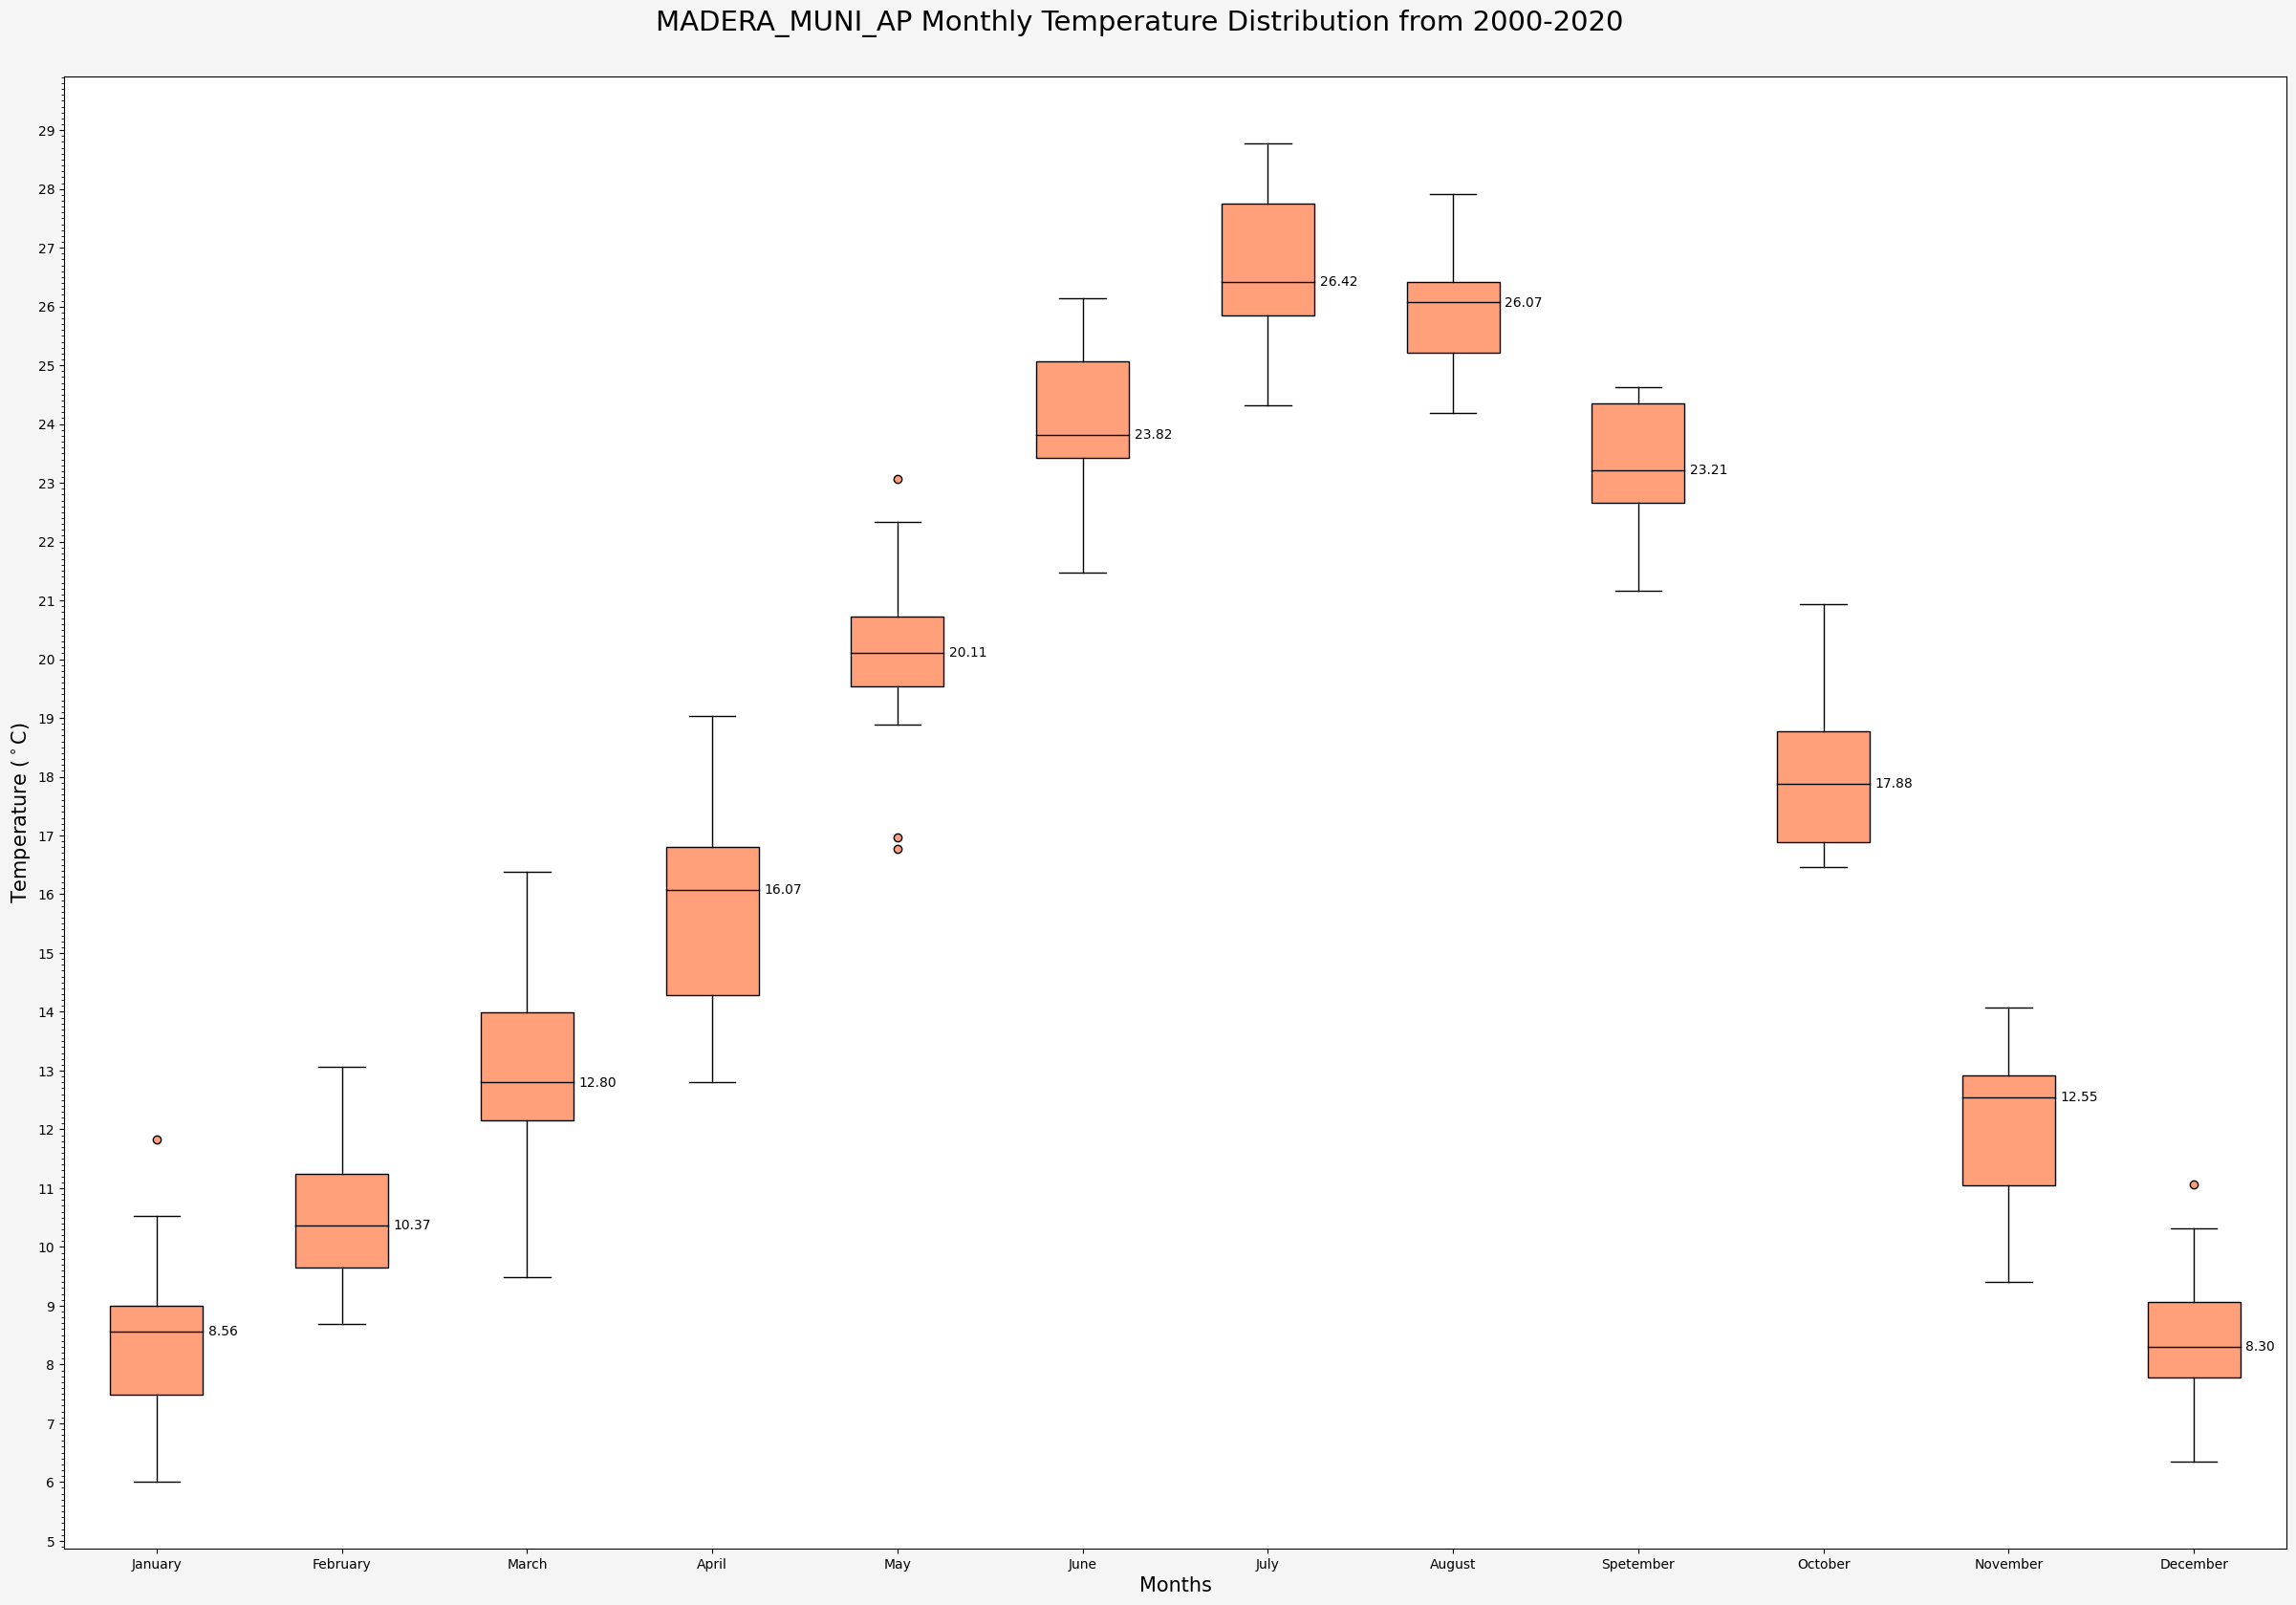

In [20]:
 monthly_temp_precip_box_plot(temp_df, 'temp', station_name)

### Plot the seasonal temperature graphs

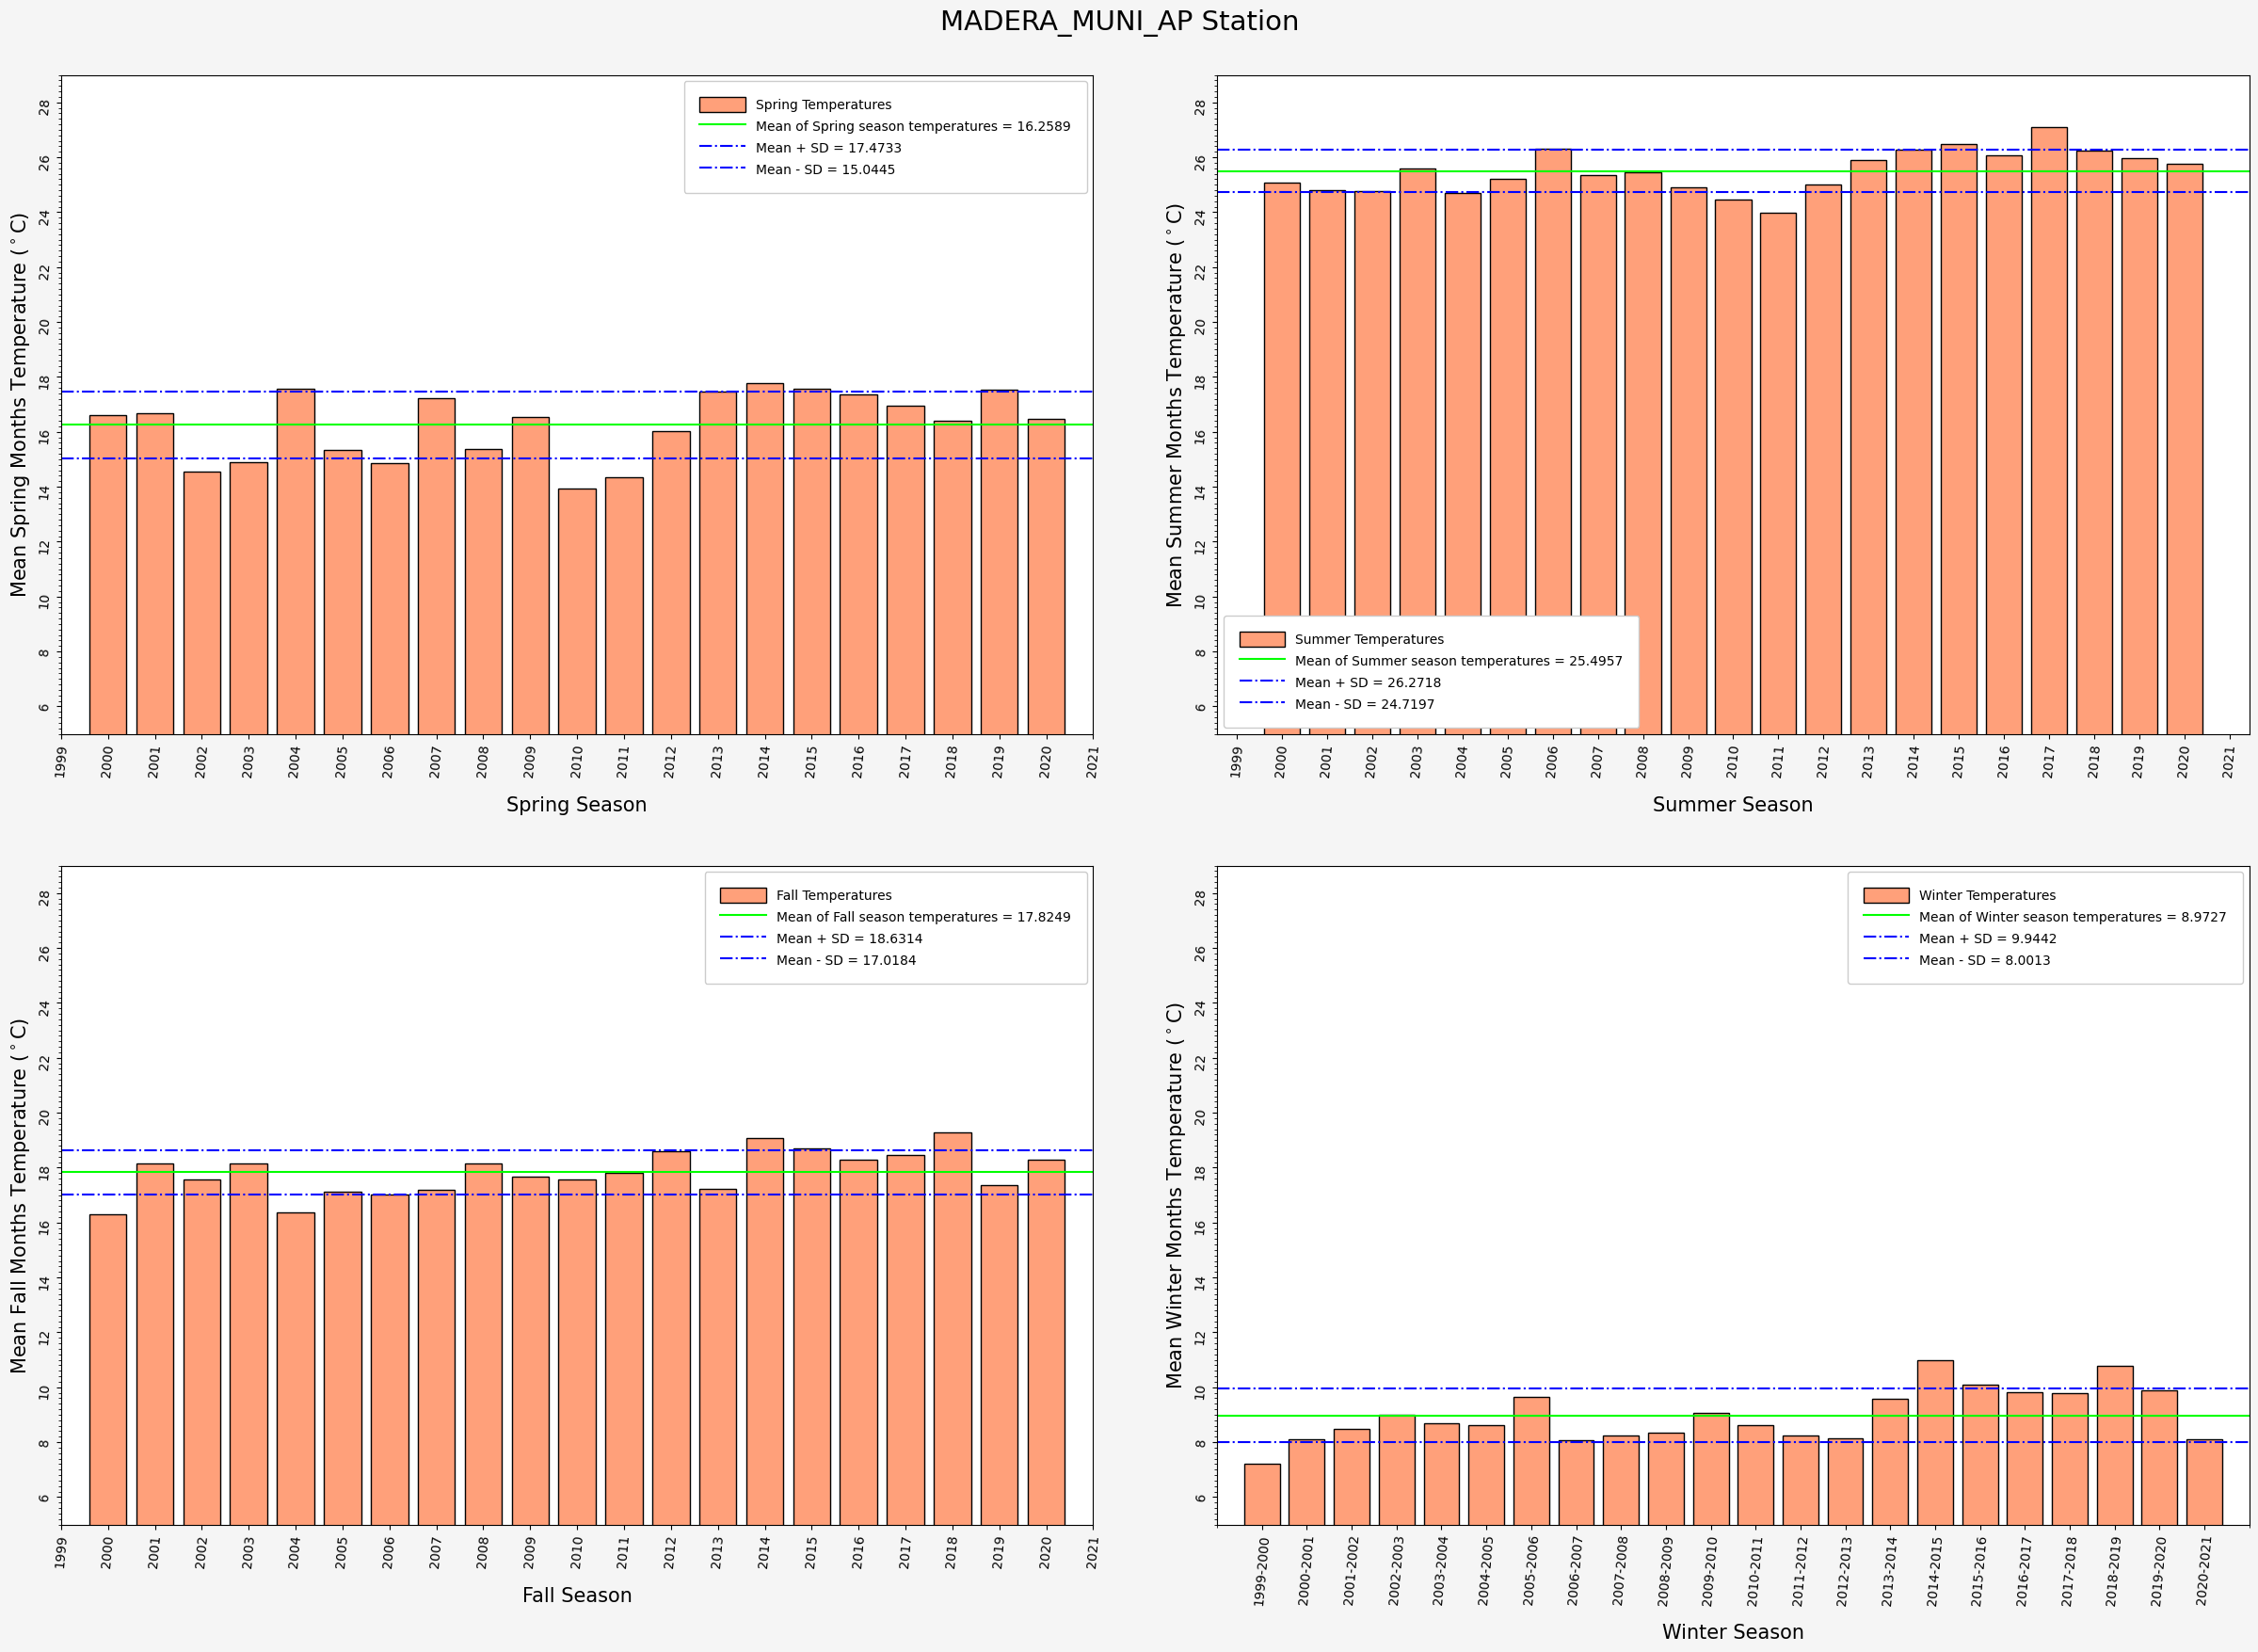

In [21]:
fig, ax = plt.subplots(2,2)

plt.rcParams['figure.figsize'] = [30, 20]
title = station_name + ' Station'
fig.suptitle(title, fontsize=21, y=0.915)

max_val = summer_temps_df['Summer_Mean_Temp'].max().round()+2
min_val = winter_temps_df['Winter_Mean_Temp'].min().round()-2


# Change figure background color
fig.patch.set_facecolor('whitesmoke')

### Plot the spring temperatures Subplot(4211)

# Plot the temperature 
x = pd.to_datetime(spring_temps_df['Spring_Year'],format='%Y')
y = spring_temps_df['Spring_Mean_Temp']

ylabel_text = 'Mean Spring Months Temperature ($^\circ$C)'
        
main_plot1 = ax[0, 0].bar(x, list(y), color='lightsalmon',
                   edgecolor='black', width=290)
 
# Plot zero line
ax[0,0].axhline(y=0, color='black', linewidth=0.4)

# Plot the mean and standard deviation values
mean1 = ax[0, 0].axhline(y=mean_of_springtemp_vals, color='lime',linestyle='-')
mean_with_sd1 = ax[0, 0].axhline(y=(mean_of_springtemp_vals + sd_spring_temp), color='b',linestyle='-.')
mean_without_sd1 = ax[0, 0].axhline(y=(mean_of_springtemp_vals - sd_spring_temp), color='b',linestyle='-.')

### Set the x-axis and y-axis parameters
ax[0, 0].xaxis.set_major_locator(mdates.YearLocator()) 
ax[0, 0].xaxis.set_minor_locator(mdates.YearLocator())
#ax[0, 0].set_xticklabels([])
ax[0, 0].tick_params(rotation=85)

ax[0, 0].set_xlim(pd.to_datetime('1999',format='%Y'), pd.to_datetime('2021',format='%Y'))
ax[0,0].set_xlabel('Spring Season', fontsize=15, labelpad=14)

ax[0, 0].set_ylabel(ylabel_text, fontsize=15)
ax[0, 0].yaxis.set_major_locator(plt.MultipleLocator(2))
ax[0, 0].yaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax[0, 0].set_ylim(min_val, max_val)


# Set the legend
string1 = 'Mean of Spring season temperatures = ' + str(round(mean_of_springtemp_vals,4))
string2 = 'Mean + SD = ' + str(round(mean_of_springtemp_vals + sd_spring_temp, 4))
string3 = 'Mean - SD = ' + str(round(mean_of_springtemp_vals - sd_spring_temp, 4))
ax[0,0].legend(handles= [main_plot1, mean1, mean_with_sd1, mean_without_sd1], 
               labels = ['Spring Temperatures',string1, string2, string3 ], 
               ncol = 1, loc= 'upper right', borderpad = 1.2, handleheight = 1.4, 
               handlelength = 3.5, framealpha = 1)
#---
### Plot the summer temperatures Subplot(4212)

# Plot the temperature 
x2 = pd.to_datetime(summer_temps_df['Summer_Year'],format='%Y')
y2 = summer_temps_df['Summer_Mean_Temp']

ylabel_text2 = 'Mean Summer Months Temperature ($^\circ$C)'
        
main_plot2 = ax[0, 1].bar(x2, list(y2), color='lightsalmon',
                   edgecolor='black', width=290)

# Plot zero line
ax[0,1].axhline(y=0, color='black', linewidth=0.4)

# Plot the mean and standard deviation values
mean2 = ax[0, 1].axhline(y=mean_of_summertemp_vals, color='lime',linestyle='-')
mean_with_sd2 = ax[0, 1].axhline(y=(mean_of_summertemp_vals + sd_summer_temp), color='b',linestyle='-.')
mean_without_sd2 = ax[0, 1].axhline(y=(mean_of_summertemp_vals - sd_summer_temp), color='b',linestyle='-.')

### Set the x-axis and y-axis parameters
ax[0, 1].xaxis.set_major_locator(mdates.YearLocator()) 
ax[0, 1].xaxis.set_minor_locator(mdates.YearLocator())
#ax[0, 1].set_xticklabels([])
ax[0, 1].tick_params(rotation=85)
ax[0,1].set_xlabel('Summer Season', fontsize=15, labelpad=14)

ax[0, 1].set_ylabel(ylabel_text2, fontsize=15)
ax[0, 1].yaxis.set_major_locator(plt.MultipleLocator(2))
ax[0, 1].yaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax[0, 1].set_ylim(min_val, max_val)

# Set the legend
string1 = 'Mean of Summer season temperatures = ' + str(round(mean_of_summertemp_vals,4))
string2 = 'Mean + SD = ' + str(round(mean_of_summertemp_vals + sd_summer_temp, 4))
string3 = 'Mean - SD = ' + str(round(mean_of_summertemp_vals - sd_summer_temp, 4))
ax[0,1].legend(handles= [main_plot1, mean1, mean_with_sd1, mean_without_sd1], 
               labels = ['Summer Temperatures',string1, string2, string3 ], 
               ncol = 1, loc= 'best', borderpad = 1.2, handleheight = 1.4, 
               handlelength = 3.5, framealpha = 1)
#---
### Plot the fall temperatures Subplot(4221)

### Plot the temperature 
x3 = pd.to_datetime(fall_temps_df['Fall_Year'],format='%Y')
y3 = fall_temps_df['Fall_Mean_Temp']

ylabel_text3 = 'Mean Fall Months Temperature ($^\circ$C)'
        
main_plot3 = ax[1, 0].bar(x3, list(y3), color='lightsalmon',
                   edgecolor='black', width=290)

# Plot zero line
ax[1,0].axhline(y=0, color='black', linewidth=0.4)

# Plot the mean and standard deviation values
mean3 = ax[1, 0].axhline(y=mean_of_falltemp_vals, color='lime',linestyle='-')
mean_with_sd3 = ax[1, 0].axhline(y=(mean_of_falltemp_vals + sd_fall_temp), color='b',linestyle='-.')
mean_without_sd3 = ax[1, 0].axhline(y=(mean_of_falltemp_vals - sd_fall_temp), color='b',linestyle='-.')


### Set the x-axis and y-axis parameters
ax[1, 0].xaxis.set_major_locator(mdates.YearLocator()) 
ax[1, 0].xaxis.set_minor_locator(mdates.YearLocator())
    
    
ax[1, 0].set_xlim(pd.to_datetime('1999',format='%Y'), pd.to_datetime('2021',format='%Y'))
ax[1, 0].tick_params(rotation=85)
ax[1, 0].set_xlabel('Fall Season', fontsize=15, labelpad=14)
        
ax[1, 0].set_ylabel(ylabel_text3, fontsize=15)
ax[1, 0].yaxis.set_major_locator(plt.MultipleLocator(2))
ax[1, 0].yaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax[1, 0].set_ylim(min_val, max_val)

# Set the legend
string1 = 'Mean of Fall season temperatures = ' + str(round(mean_of_falltemp_vals,4))
string2 = 'Mean + SD = ' + str(round(mean_of_falltemp_vals + sd_fall_temp, 4))
string3 = 'Mean - SD = ' + str(round(mean_of_falltemp_vals - sd_fall_temp, 4))
ax[1,0].legend(handles= [main_plot1, mean1, mean_with_sd1, mean_without_sd1], 
               labels = ['Fall Temperatures',string1, string2, string3 ], 
               ncol = 1, loc= 'upper right', borderpad = 1.2, handleheight = 1.4, 
               handlelength = 3.5, framealpha = 1)
#---
### Plot the winter temperatures Subplot(4222)

winter_temps_df['Winter_Year'] = winter_temps_df['Winter_Year'].apply(lambda x: int(x.split('-')[0]))

x4 = pd.to_datetime(winter_temps_df['Winter_Year'],format='%Y')
y4 = winter_temps_df['Winter_Mean_Temp']

ylabel_text4 = 'Mean Winter Months Temperature ($^\circ$C)'
        
main_plot4 = ax[1, 1].bar(x4, list(y4), color='lightsalmon',
                   edgecolor='black', width=290)

new_xticks = ['1999-2000', '2000-2001', '2001-2002', '2002-2003', '2003-2004', '2004-2005', 
                    '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
                    '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017',  
                    '2017-2018', '2018-2019', '2019-2020', '2020-2021']


# Plot zero line
ax[1,1].axhline(y=0, color='black', linewidth=0.4)

# Plot the mean and standard deviation values
mean4 = ax[1,1].axhline(y=mean_of_wintertemp_vals, color='lime',linestyle='-')
mean_with_sd4 = ax[1,1].axhline(y=(mean_of_wintertemp_vals + sd_winter_temp), color='b',linestyle='-.')
mean_without_sd4 = ax[1,1].axhline(y=(mean_of_wintertemp_vals - sd_winter_temp), color='b',linestyle='-.')
        
### Set the x-axis and y-axis parameters
ax[1,1].xaxis.set_major_locator(mdates.YearLocator()) 
ax[1,1].xaxis.set_minor_locator(mdates.YearLocator())
        
ax[1,1].set_xlim(pd.to_datetime('1998',format='%Y'), pd.to_datetime('2021',format='%Y'))
ax[1,1].set_xticks(pd.to_datetime(winter_temps_df['Winter_Year'],format='%Y'))
ax[1,1].set_xticklabels(new_xticks)
ax[1,1].tick_params(rotation=85)
ax[1,1].set_xlabel('Winter Season', fontsize=15, labelpad=14)

ax[1,1].set_ylabel(ylabel_text4, fontsize=15)
ax[1,1].yaxis.set_major_locator(plt.MultipleLocator(2))
ax[1,1].yaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax[1,1].set_ylim(min_val, max_val)

# Set the legend
string1 = 'Mean of Winter season temperatures = ' + str(round(mean_of_wintertemp_vals,4))
string2 = 'Mean + SD = ' + str(round(mean_of_wintertemp_vals + sd_winter_temp, 4))
string3 = 'Mean - SD = ' + str(round(mean_of_wintertemp_vals - sd_winter_temp, 4))
ax[1,1].legend(handles= [main_plot1, mean1, mean_with_sd1, mean_without_sd1], 
               labels = ['Winter Temperatures',string1, string2, string3 ], 
               ncol = 1, loc= 'upper right', borderpad = 1.2, handleheight = 1.4, 
               handlelength = 3.5, framealpha = 1)
#---

plt.subplots_adjust(hspace=0.2, wspace=0.12)

# Save the figure
figname = (station_name + '_seasonal_temperatures_bar_plot')
directory_name = station_name
plt.savefig(os.path.join(directory_name, figname))

## Read the Precipitation CSV file for the same station

In [22]:
# Read Precipitation csv file
df2 = pd.read_csv(precipitation_csv_file_loc)

#df2['Date'].dtype
#df2['Date']

In [23]:
pd.to_datetime(df2['Date'],format='%Y/%m')
df2['Date'].apply(lambda x: pd.to_datetime(x).strftime('%m/%Y'))

0      09/1998
1      10/1998
2      11/1998
3      01/1999
4      02/1999
        ...   
285    07/2022
286    08/2022
287    09/2022
288    10/2022
289    11/2022
Name: Date, Length: 290, dtype: object

In [24]:
df2['Date']

0      1998/09
1      1998/10
2      1998/11
3      1999/01
4      1999/02
        ...   
285    2022/07
286    2022/08
287    2022/09
288    2022/10
289    2022/11
Name: Date, Length: 290, dtype: object

### Check missing data (months) from the Precipitation dataset

In [25]:
# extract the month and year from the Date column
df2['Year'] = pd.to_datetime(df2['Date'],format='%Y/%m').dt.year
df2['Month'] = pd.to_datetime(df2['Date'], format='%Y/%m').dt.month

# get the minimum and maximum years in the dataset
min_year = df2['Year'].min()
max_year = df2['Year'].max()

# create a reference DataFrame with all possible months and years
all_months = range(1, 13)
all_years = range(min_year, max_year + 1)
reference_df = pd.DataFrame(list(itertools.product(all_years, all_months)), columns=['Year', 'Month'])

# find missing months
missing_months = reference_df[~reference_df.set_index(['Year', 'Month']).index.isin(df2.set_index(['Year', 'Month']).index)]

# check if any months are missing
if missing_months.empty:
    print("No missing months found in the dataset.")
else:
    print("Missing months in the dataset:")
    print(missing_months)

Missing months in the dataset:
     Year  Month
0    1998      1
1    1998      2
2    1998      3
3    1998      4
4    1998      5
5    1998      6
6    1998      7
7    1998      8
11   1998     12
299  2022     12


In [26]:
# count the number of available data points per year
data_counts = df2.groupby('Year').size()

# calculate the percentage of available data for each year
percentage_available_data = (data_counts / 12) * 100

# display the results
print("Percentage of available data for each year:")
print(percentage_available_data.loc[range(2000, 2022)])

Percentage of available data for each year:
Year
2000    100.0
2001    100.0
2002    100.0
2003    100.0
2004    100.0
2005    100.0
2006    100.0
2007    100.0
2008    100.0
2009    100.0
2010    100.0
2011    100.0
2012    100.0
2013    100.0
2014    100.0
2015    100.0
2016    100.0
2017    100.0
2018    100.0
2019    100.0
2020    100.0
2021    100.0
dtype: float64


### Check the Precipitation column for trace values (-1) and replace them with very small number

In [27]:
tn_precipitation_trace_value = len(df2[(df2['Precipitation'] < 0)])

if (tn_precipitation_trace_value > 0):
    df2['Precipitation'] = df2['Precipitation'].apply(lambda x: 0.0001 if x < 0.0 else x)

df2[(df2['Precipitation'] < 0)]

,STATION_ID,Station_Name,Latitude,Longitude,Elevation,Precipitation,Measurement_Flag,QC_Flag,Source_Flag,Source_Index,Date,Year,Month


### Create a new dataframe for precipitation data from 2000/01 to 2020/12

In [28]:
# Create a new df for precipitation data from 2000/01 to 2020/12
df3 = df2.loc[(df2['Date'] >= '2000/01') & (df2['Date'] < '2021/01')].copy()

df3['Precipitation'] /= 100
# Check the new dataframe
df3

,STATION_ID,Station_Name,Latitude,Longitude,Elevation,Precipitation,Measurement_Flag,QC_Flag,Source_Flag,Source_Index,Date,Year,Month
15,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,8.140000,,,D,75659,2000/01,2000,1
16,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,11.410000,,,D,75659,2000/02,2000,2
17,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,3.300000,,,D,75659,2000/03,2000,3
18,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,2.590000,,,D,75659,2000/04,2000,4
19,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,0.540000,,,D,75659,2000/05,2000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,0.000001,,,D,75659,2020/08,2020,8
263,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,0.000001,,,D,75659,2020/09,2020,9
264,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,0.000000,,,D,75659,2020/10,2020,10
265,USW00093242,CA MADERA MUNI AP,36.9878,-120.1106,77.1,0.400000,,,D,75659,2020/11,2020,11


In [29]:
# Check if there is any NaN values in the Measurement_Flag column

df3[df3['Measurement_Flag'].isna()== True]

,STATION_ID,Station_Name,Latitude,Longitude,Elevation,Precipitation,Measurement_Flag,QC_Flag,Source_Flag,Source_Index,Date,Year,Month


In [30]:
# Check if the Quality_Flag column is False and Precipitation column has any trace value, which is -1

df3[(df3['QC_Flag'].isna()== False) & ((df3['Date'] >= '1998/01') & (df3['Date'] < '2023/01')) & (df3['Precipitation'] == -1) ]

,STATION_ID,Station_Name,Latitude,Longitude,Elevation,Precipitation,Measurement_Flag,QC_Flag,Source_Flag,Source_Index,Date,Year,Month


### Plot Temperature and Precipitation from the dataframes

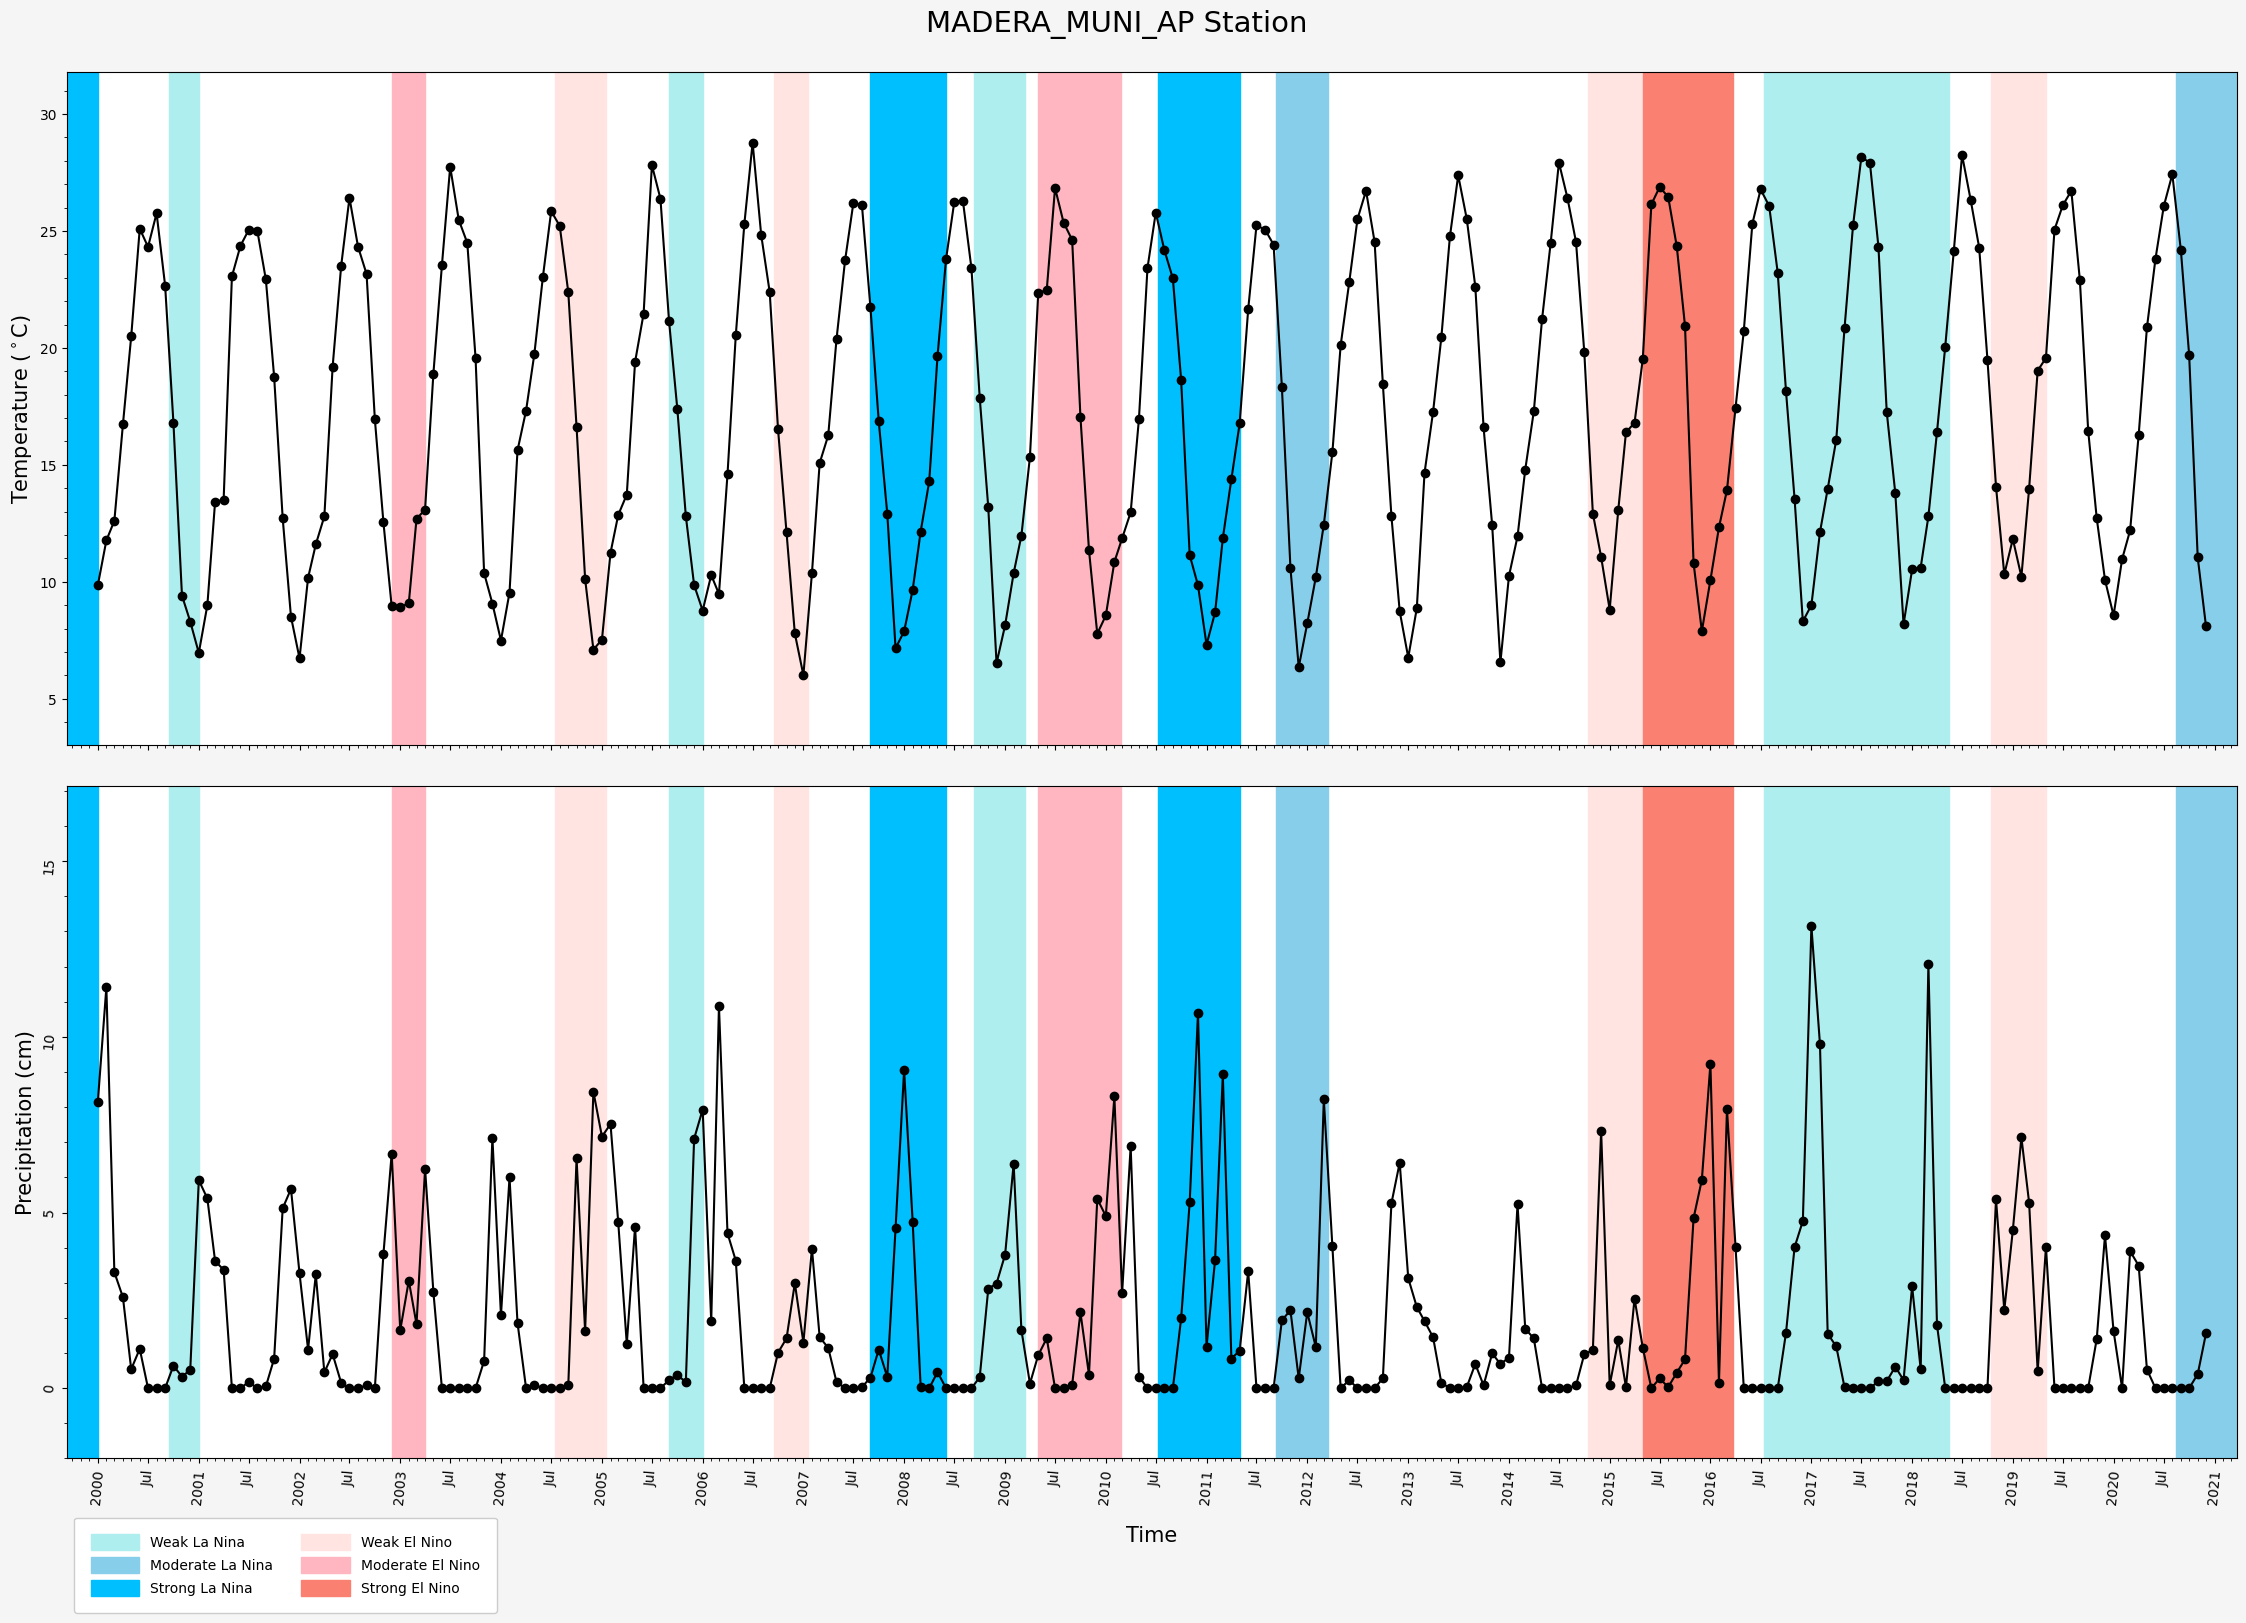

In [31]:
plot_t_and_p_data(df, df3, station_name)

### Create columns called 'Winter' and 'Winter_Year' in the new dataframe

In [32]:
#df3['Winter_year'] = df3['Date'].dt.year.where(df3['Winter'], df3['Date'].dt.year -1)

# Create a winter season column based on the month and year of each date
df3['Date'] = pd.to_datetime(df3['Date'])
earliest_year = df3['Date'].dt.year.min()
df3['Winter'] = (((df3['Date'].dt.month == 12) & (df3['Date'].dt.year == earliest_year)) | 
                 ((df3['Date'].dt.month == 12) & (df3['Date'].dt.year != earliest_year)) | 
                 ((df3['Date'].dt.month == 1) & (df3['Date'].dt.year == earliest_year)) |
                 ((df3['Date'].dt.month == 1) & (df3['Date'].dt.year != earliest_year)) |
                 ((df3['Date'].dt.month == 2) & (df3['Date'].dt.year == earliest_year)) |
                 ((df3['Date'].dt.month == 2) & (df3['Date'].dt.year != earliest_year)))

# Create a Winter_Year column based on the where Winter column is True
df3['Winter_Year'] = df3['Date'].dt.year.where(df3['Winter'])

# Check the results
#df3[(df3['Date'] >= '2000/01') & (df3['Date'] < '2005/01') & (df3['Winter'] == True)] [['Precipitation', 'Date', 'Winter', 'Winter_Year']]
df3[(df3['Date'] >= '2019/01') & (df3['Date'] < '2022/01')] [['Precipitation', 'Date', 'Winter', 'Winter_Year']]

,Precipitation,Date,Winter,Winter_Year
243,4.500000,2019-01-01,True,2019.0
244,7.140000,2019-02-01,True,2019.0
245,5.280000,2019-03-01,False,NaN
246,0.480000,2019-04-01,False,NaN
247,4.020000,2019-05-01,False,NaN
248,0.000000,2019-06-01,False,NaN
249,0.000000,2019-07-01,False,NaN
250,0.000000,2019-08-01,False,NaN
251,0.000001,2019-09-01,False,NaN
252,0.000000,2019-10-01,False,NaN


### Calculate the Mean and Median of Winter months and create a new df called winter_stats_df

In [33]:
winter_stats = []

for year in range((df3['Winter_Year'].dropna().astype(int).min()),(df3['Winter_Year'].dropna().astype(int).max() + 1)):
    if year == df3['Winter_Year'].min():
        winter_months = ['01', '02']
        winter_data = df3[(df3['Winter_Year'] == year) & (df3['Date'].dt.strftime('%m').isin(winter_months))]
        
        #winter_mean = winter_data['Precipitation'].mean()
        winter_mean = winter_data['Precipitation'].sum() / 3
        winter_median = winter_data['Precipitation'].median()
        
        winter_stats.append({
            'Winter_Year': f'{year - 1}-{year}',
            'Winter_Mean': winter_mean,
            'Winter_Median': winter_median
        })
    elif (year <  df3['Winter_Year'].max()):
        prev_yr_month =['12']
        winter_months = ['01', '02']
        winter_data = df3[((df3['Winter_Year'] == (year-1)) & (df3['Date'].dt.strftime('%m').isin(prev_yr_month)))
                         | ((df3['Winter_Year'] == year) & (df3['Date'].dt.strftime('%m').isin(winter_months)))]
                
        winter_mean = winter_data['Precipitation'].mean()
        winter_median = winter_data['Precipitation'].median()
        
        winter_stats.append({
            'Winter_Year': f'{year - 1}-{year}',
            'Winter_Mean': winter_mean,
            'Winter_Median': winter_median
        })
    elif (year == df3['Winter_Year'].max()):
        prev_yr_month =['12']
        winter_months = ['01', '02']
        winter_data = df3[((df3['Winter_Year'] == (year-1)) & (df3['Date'].dt.strftime('%m').isin(prev_yr_month)))
                         | ((df3['Winter_Year'] == year) & (df3['Date'].dt.strftime('%m').isin(winter_months)))]
        
        winter_mean = winter_data['Precipitation'].mean()
        winter_median = winter_data['Precipitation'].median()
        
        winter_stats.append({
            'Winter_Year': f'{year - 1}-{year}',
            'Winter_Mean': winter_mean,
            'Winter_Median': winter_median
        })
        
        # Get the final year's final month since it is part of winter months
        final_yr_month = ['12']
        winter_data = df3[((df3['Winter_Year'] == year) & (df3['Date'].dt.strftime('%m').isin(final_yr_month)))]
        
        #winter_mean = winter_data['Precipitation'].mean()
        winter_mean = winter_data['Precipitation'].sum() / 1
        winter_median = winter_data['Precipitation'].median()
        winter_stats.append({
            'Winter_Year': f'{year}-{year + 1}',
            'Winter_Mean': winter_mean,
            'Winter_Median': winter_median
        })
    
winter_stats_df = pd.DataFrame(winter_stats)
print(winter_stats_df)

# Save the spring_stats_df to a CSV file.
spring_csv_filename = (station_name + '_Winter_mean_median_valuess.csv')
path=(station_name + '/' + spring_csv_filename)
winter_stats_df.to_csv(path)

   Winter_Year  Winter_Mean  Winter_Median
0    1999-2000     6.516667          9.775
1    2000-2001     3.946667          5.400
2    2001-2002     3.346667          3.270
3    2002-2003     3.796667          3.060
4    2003-2004     5.066667          6.000
5    2004-2005     7.706667          7.520
6    2005-2006     5.643333          7.100
7    2006-2007     2.753333          2.990
8    2007-2008     6.113333          4.740
9    2008-2009     4.390000          3.800
10   2009-2010     6.200000          5.390
11   2010-2011     5.166667          3.650
12   2011-2012     1.203333          1.170
13   2012-2013     3.953333          3.130
14   2013-2014     2.263333          0.870
15   2014-2015     2.926667          1.370
16   2015-2016     5.106667          5.930
17   2016-2017     9.233333          9.790
18   2017-2018     1.223333          0.540
19   2018-2019     4.620000          4.500
20   2019-2020     1.993334          1.630
21   2020-2021     1.560000          1.560


### Calculate the mean and standard deviation of Winter_Mean values from winter_stats_df

In [34]:
sd = winter_stats_df['Winter_Mean'].std()
mean_of_winter_mean_vals = winter_stats_df['Winter_Mean'].mean()
print('Mean of winter mean values= ',mean_of_winter_mean_vals, ' Standard Deviation of winter mean values= ', sd)
print('Mean + SD = ', mean_of_winter_mean_vals+sd )
print('Mean - SD = ', mean_of_winter_mean_vals-sd )

Mean of winter mean values=  4.305909106060607  Standard Deviation of winter mean values=  2.1086646298312814
Mean + SD =  6.414573735891889
Mean - SD =  2.1972444762293257


### Plot the Mean Winter precipitation values

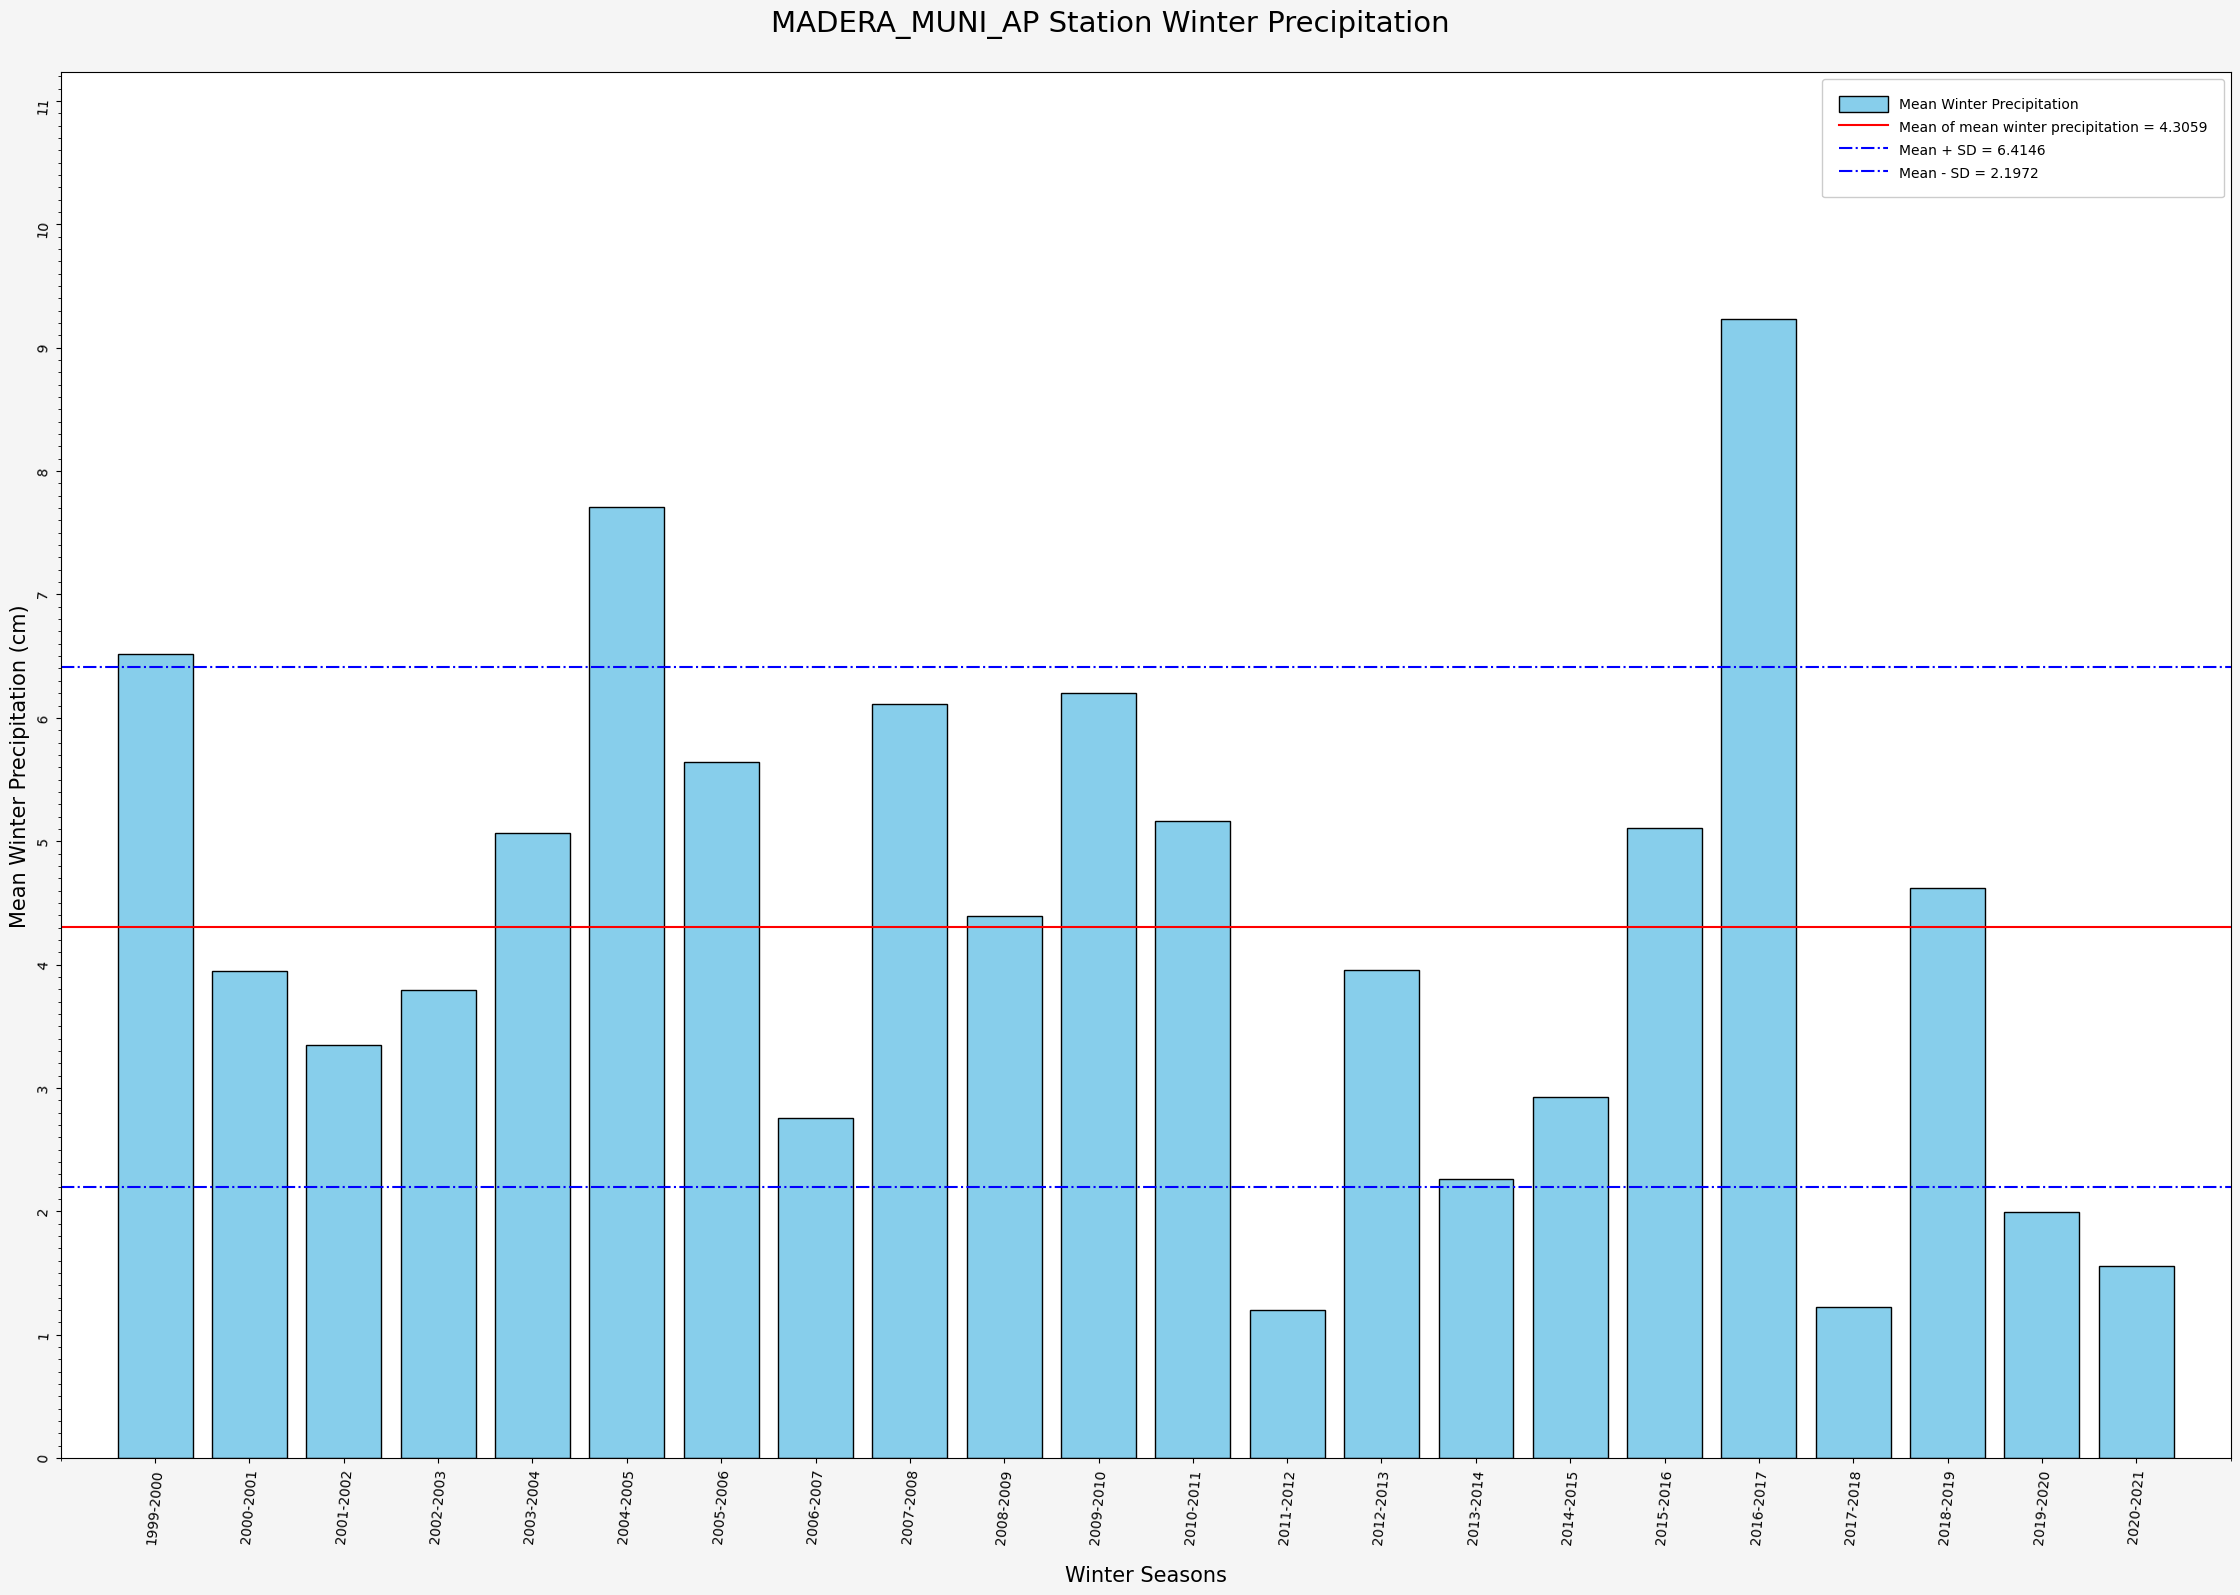

In [35]:
plot_mean_seasonal_precipitation(winter_stats_df, mean_of_winter_mean_vals, sd, 'Winter', station_name)

### Create columns called 'Spring' and 'Spring_Year' in the new dataframe

In [36]:
# Create a Spring season column based on the month and year of each date
df3['Spring'] = ((df3['Date'].dt.month == 3) | (df3['Date'].dt.month == 4) | (df3['Date'].dt.month == 5))
# Create the Spring_Year column based on the Spring column
df3['Spring_Year'] = df3['Date'].dt.year.where(df3['Spring'])

### Calculate the Mean and Median of Spring months and create a new df called spring_stats_df

In [37]:
spring_stats = []

min_year = df3['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y')).astype(int).min()
max_year = df3['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y')).astype(int).max()

for year in range(min_year, max_year+1):
    spring_months = ['03', '04', '05']
    spring_data = df3[(df3['Spring_Year'] == year) & (df3['Date'].dt.strftime('%m').isin(spring_months))]
    #spring_mean = spring_data['Precipitation'].mean()
    spring_mean = spring_data['Precipitation'].sum() / 3
    spring_median = spring_data['Precipitation'].median()
    spring_stats.append({
        'Spring_Year': f'{year}',
        'Spring_Mean': spring_mean,
        'Spring_Median': spring_median
    })

spring_stats_df = pd.DataFrame(spring_stats)
print(spring_stats_df)

# Save the spring_stats_df to a CSV file.
spring_csv_filename = (station_name + '_Spring_mean_median_valuess.csv')
path=(station_name + '/' + spring_csv_filename)
spring_stats_df.to_csv(path)

   Spring_Year  Spring_Mean  Spring_Median
0         2000     2.143333           2.59
1         2001     2.330000           3.37
2         2002     1.553333           0.97
3         2003     3.603333           2.75
4         2004     0.653334           0.10
5         2005     3.526667           4.60
6         2006     6.306667           4.41
7         2007     0.926667           1.15
8         2008     0.163334           0.03
9         2009     0.910000           0.94
10        2010     3.303333           2.70
11        2011     3.613333           1.07
12        2012     4.090000           4.05
13        2013     1.170000           1.45
14        2014     1.036667           1.42
15        2015     1.243333           1.15
16        2016     3.990000           4.03
17        2017     0.923333           1.19
18        2018     4.626667           1.81
19        2019     3.260000           4.02
20        2020     2.640000           3.49


### Calculate the mean and standard deviation of Spring_Mean values from spring_stats_df

In [38]:
sd2 = spring_stats_df['Spring_Mean'].std()
mean_of_spring_mean_vals = spring_stats_df['Spring_Mean'].mean()
print('Mean of spring mean values= ',mean_of_spring_mean_vals, ' Standard Deviation of spring mean values= ', sd2)
print('Mean + SD = ', mean_of_spring_mean_vals+sd2 )
print('Mean - SD = ', mean_of_spring_mean_vals-sd2 )

Mean of spring mean values=  2.476825476190476  Standard Deviation of spring mean values=  1.6032011098516779
Mean + SD =  4.080026586042154
Mean - SD =  0.8736243663387984


### Plot the Mean Spring precipitation values

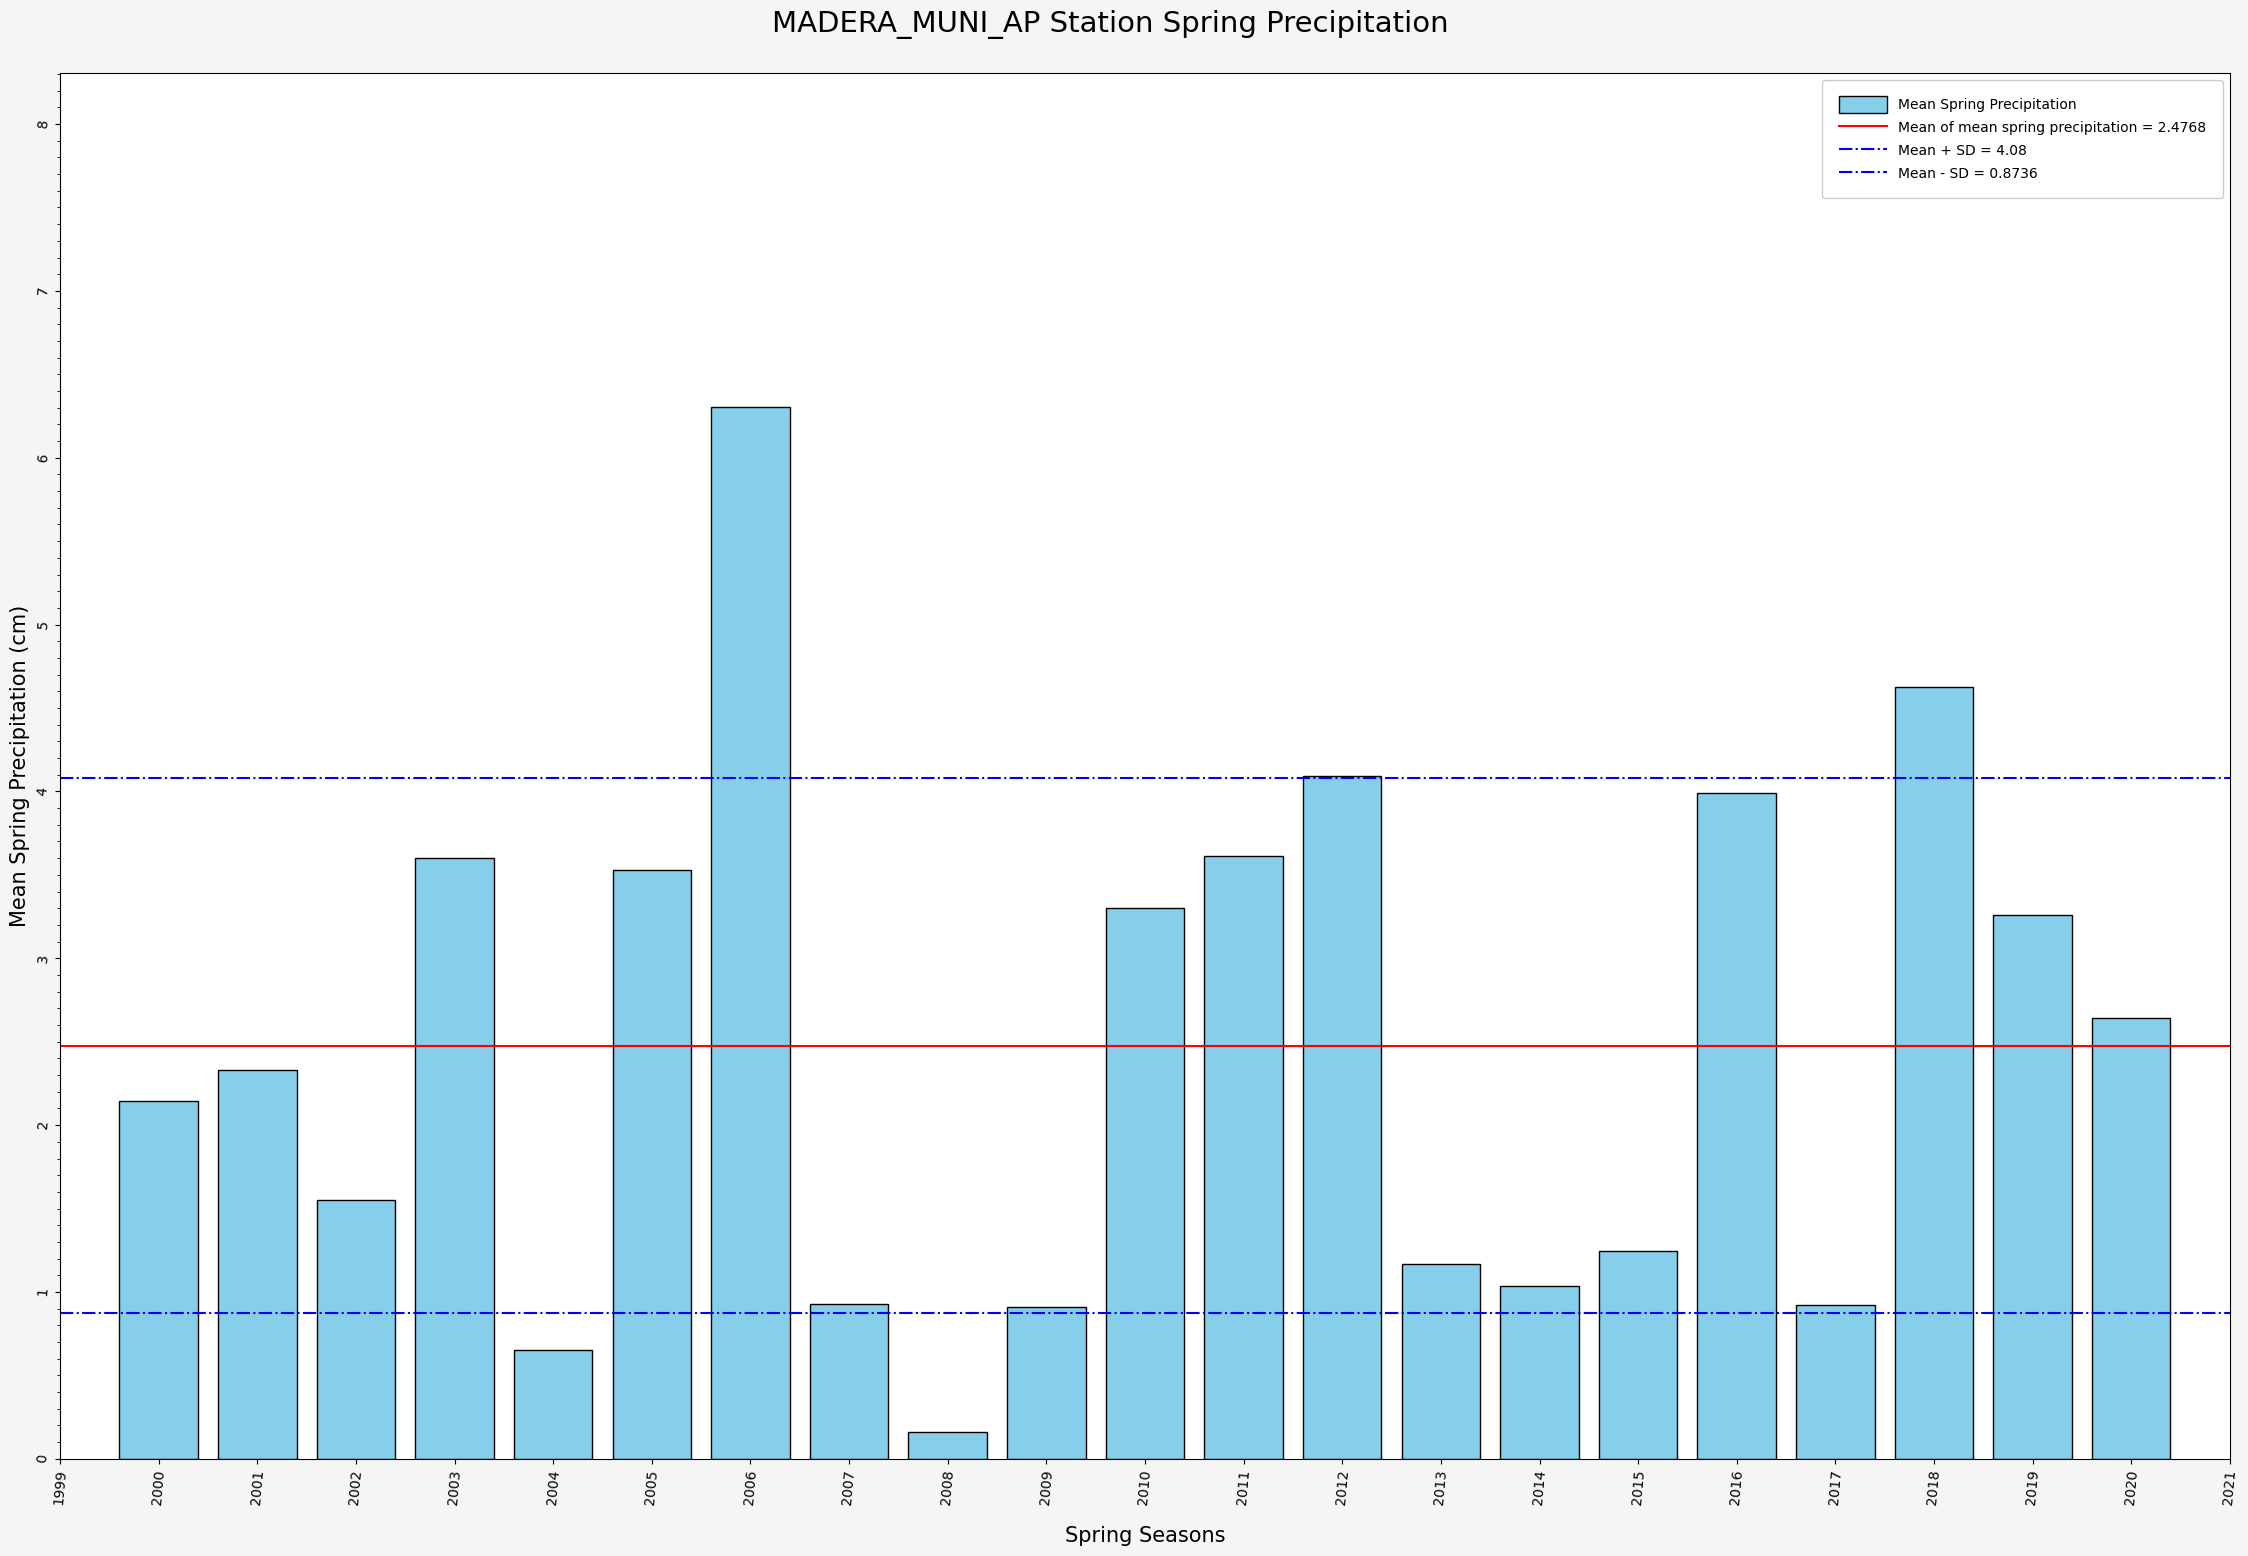

In [39]:
plot_mean_seasonal_precipitation(spring_stats_df, mean_of_spring_mean_vals, sd2, 'Spring', station_name)

### Create monthly precipitation dataframe

In [40]:
month_precip_data = {}

for year in range(min_year,max_year+1):
    month_precip_data[year] = []
    for month in range(1,13):
        months = [str('{:02d}'.format(month))]
        monthinfo = df3[(df3['Date'].dt.year == year) & (df3['Date'].dt.strftime('%m').isin(months))]
        if len(monthinfo) == 0:
            precip = np.nan
        else:
            precip = monthinfo['Precipitation'].item()
        
        month_precip_data[year].append(precip)


pivot_df = pd.DataFrame.from_dict(month_precip_data, orient='index')
pivot_df

# Save the spring_stats_df to a CSV file.
monthly_precip_csv_filename = (station_name + '_monthly_precipitation.csv')
path=(station_name + '/' + monthly_precip_csv_filename)
pivot_df.to_csv(path)

<p> you can check one of the results by running the below python command for any month <p/>
<code> df3[(df3['Date'].dt.month == 12)] </code>

### Plot monthly precipitation as box plot

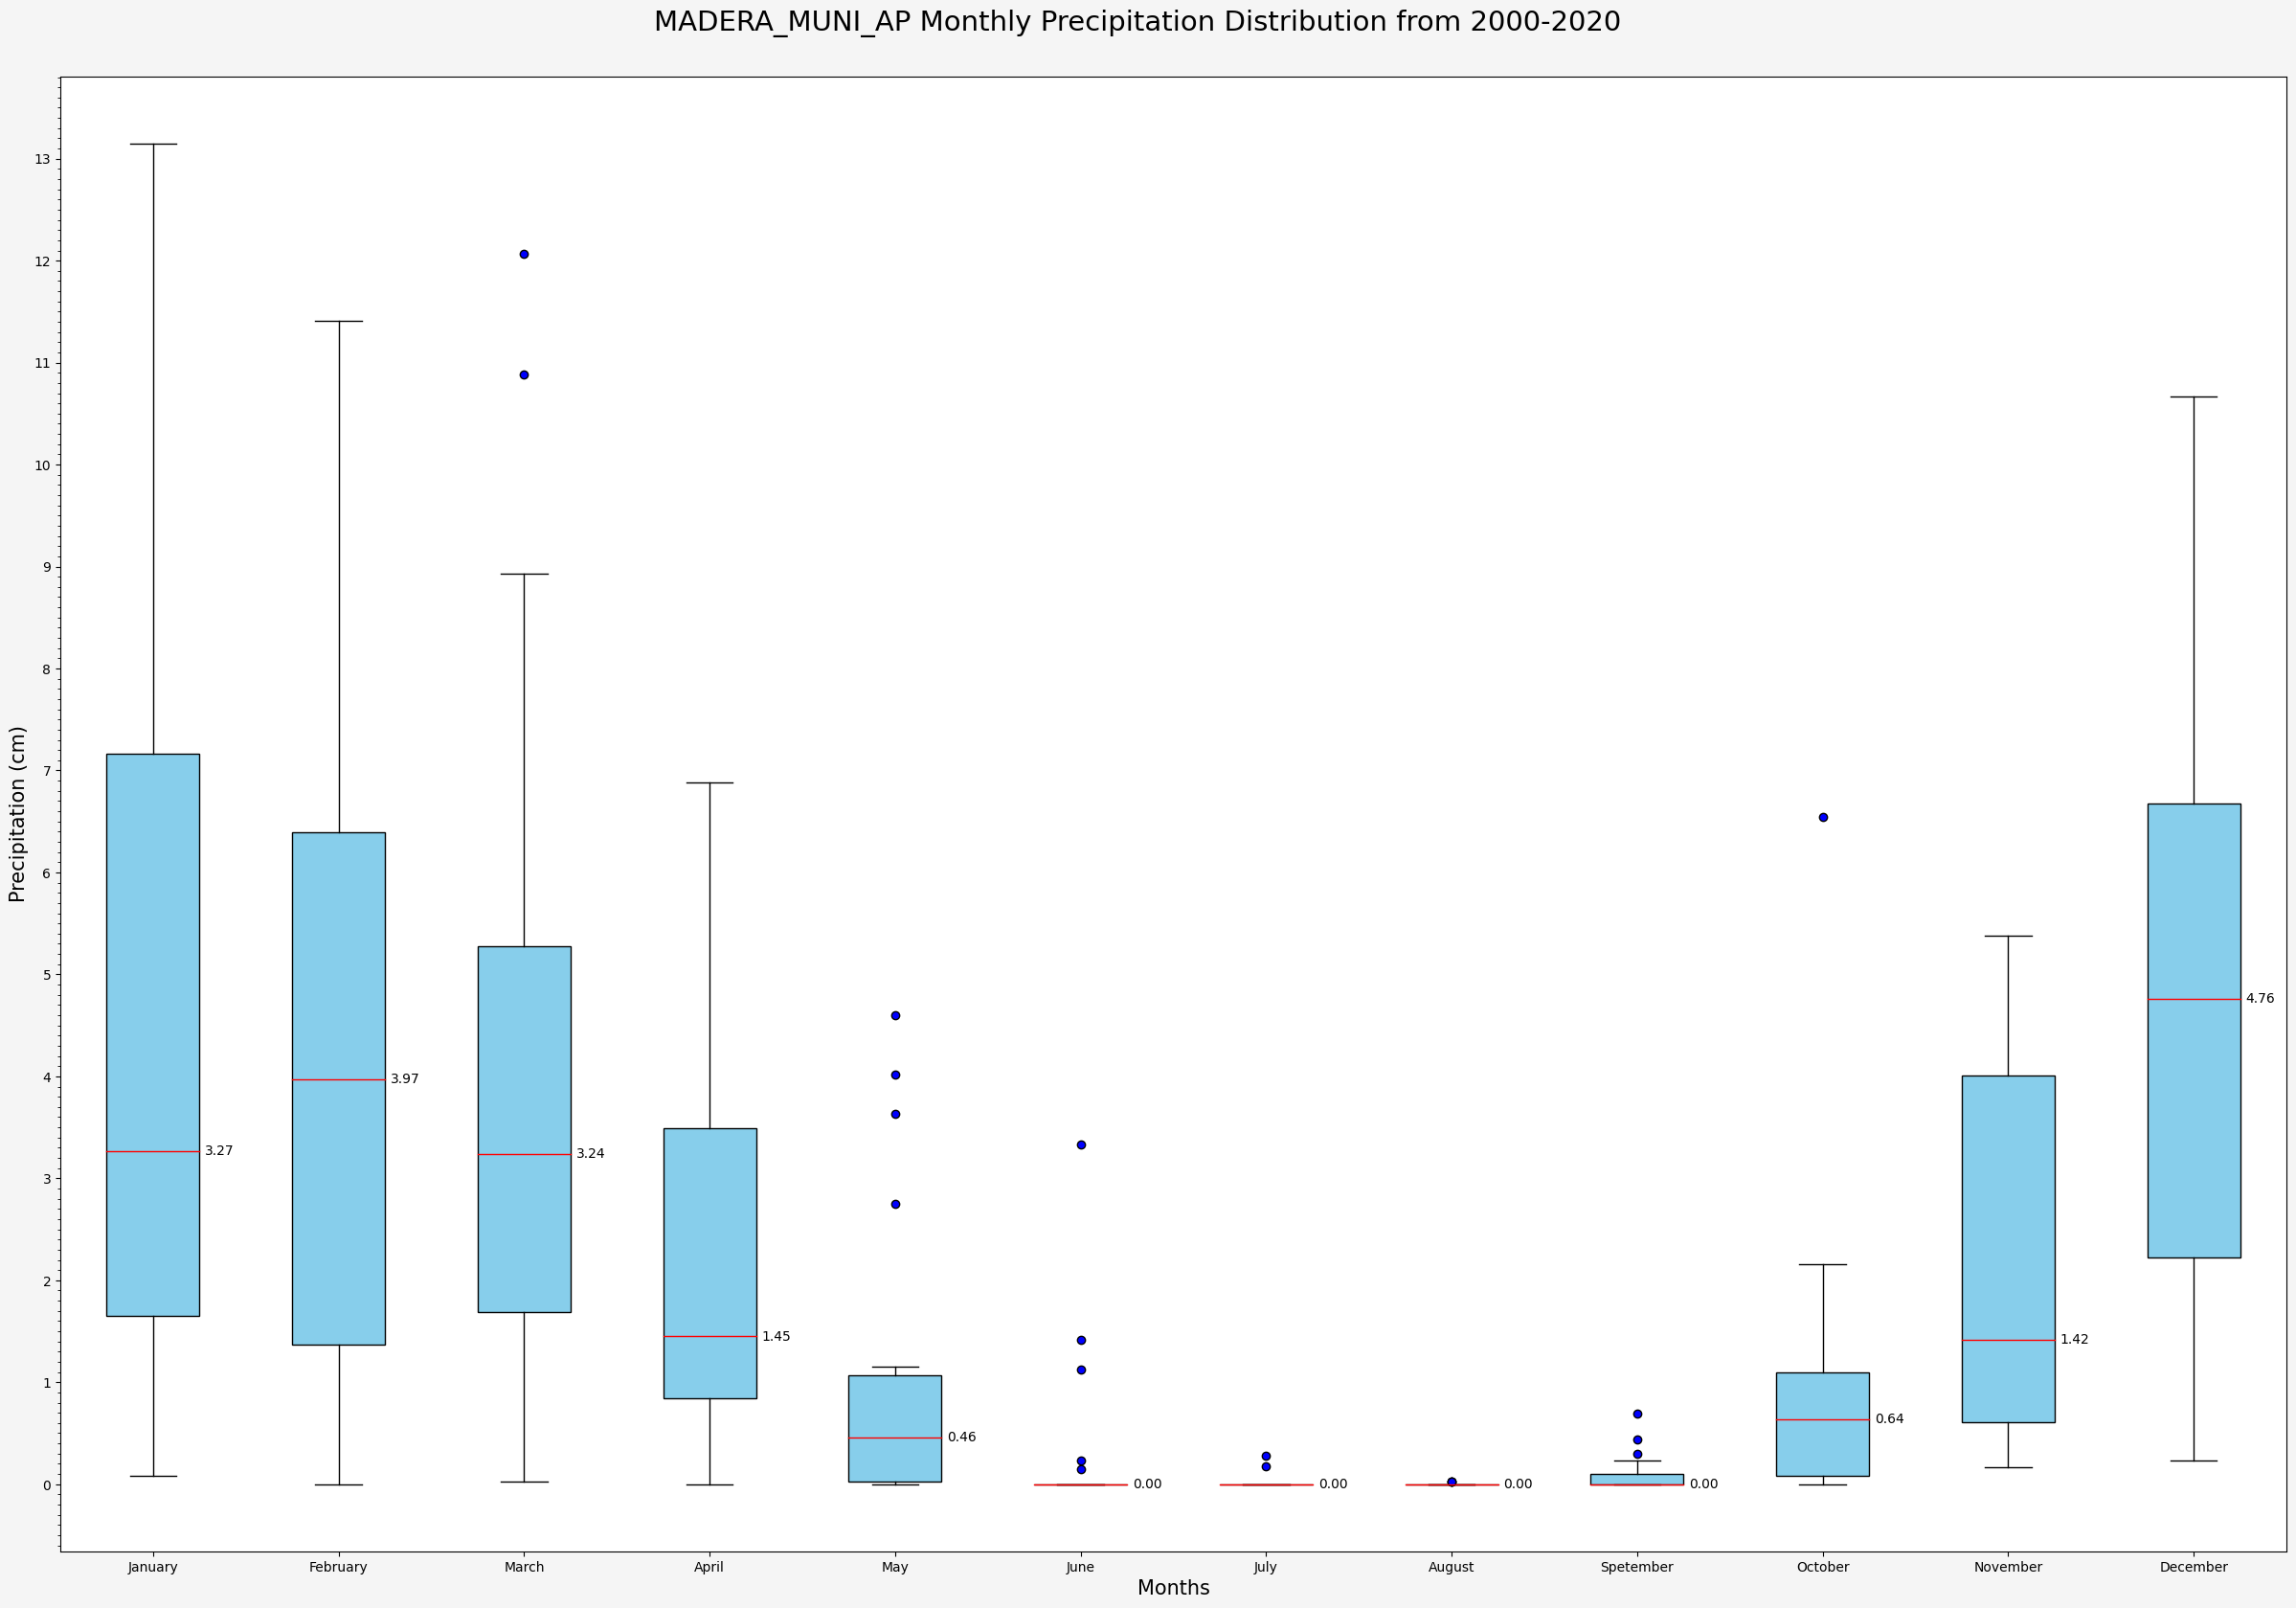

In [41]:
monthly_temp_precip_box_plot(pivot_df, 'precip', station_name)